In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random as rand
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('car_prices.csv')

df.head()



makearr = np.array(df['make'])
string_makes = np.array([str(x) for x in makearr])

string_makes = np.unique(string_makes, return_counts = True)

string_makes



d = {'makes': string_makes[0], 'frequency': string_makes[1]}
makes_frequency = pd.DataFrame(data = d)
makes_frequency

makes_frequency = makes_frequency.drop(makes_frequency[makes_frequency['frequency'] < 5000].index)
makes_frequency = makes_frequency.drop(makes_frequency[makes_frequency['makes']=='nan'].index)

makes_frequency



ford_df = df.drop(df[df['make'] != 'Ford'].index)
ford_df



fordmodelarr = np.array(ford_df['model'])
fordmodelarr = np.array([str(x) for x in fordmodelarr])
fordmodelarr = np.unique(fordmodelarr, return_counts = True)

fordmodelarr


(array(['Aspire', 'C-Max Energi', 'C-Max Hybrid', 'Contour',
        'Crown Victoria', 'E-150', 'E-250', 'E-350', 'E-Series Van',
        'E-Series Wagon', 'Econoline Cargo', 'Econoline Wagon', 'Edge',
        'Escape', 'Escape Hybrid', 'Escort', 'Excursion', 'Expedition',
        'Expedition EL', 'Explorer', 'Explorer Sport',
        'Explorer Sport Trac', 'F-150', 'F-150 Heritage',
        'F-150 SVT Lightning', 'F-250', 'F-250 Super Duty',
        'F-350 Super Duty', 'F-450 Super Duty', 'Fiesta', 'Five Hundred',
        'Flex', 'Focus', 'Focus ST', 'Freestar', 'Freestyle', 'Fusion',
        'Fusion Energi', 'Fusion Hybrid', 'Mustang', 'Mustang SVT Cobra',
        'Ranger', 'Shelby GT500', 'Taurus', 'Taurus X', 'Tempo',
        'Thunderbird', 'Transit Connect', 'Transit Van', 'Transit Wagon',
        'Windstar', 'Windstar Cargo'], dtype='<U19'),
 array([    2,   234,   312,    12,   140,     5,     2,     3,  1823,
         1282,   750,   135,  5915, 11861,   134,   105,   136,  2826

In [ ]:
ford_df = df.drop(df[df['make'] != 'Ford'].index)
ford_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000.0,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
94,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xfr151689,ca,1.0,4205.0,white,black,enterprise vehicle exchange / tra / rental / t...,14700.0,12000.0,Wed Dec 17 2014 15:05:00 GMT-0800 (PST)
938,2012,Ford,E-Series Wagon,E-350 Super Duty XL,Van,NaN,1fbss3bl8cdb20464,ca,2.0,42804.0,white,gray,enterprise vehicle exchange / tra / rental / t...,16150.0,16000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
939,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0eg0ckb55384,ca,35.0,45035.0,gray,beige,ford motor credit company llc pd,15450.0,14100.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
941,2012,Ford,Edge,SEL,SUV,automatic,2fmdk3jc5cba41602,ca,46.0,20035.0,gray,black,ford motor credit company llc pd,20700.0,20800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558799,2012,Ford,Focus,SE,Hatchback,automatic,1fahp3k24cl249912,tx,29.0,81402.0,—,gray,ford motor credit company llc,7125.0,8800.0,Tue Jul 07 2015 08:00:00 GMT-0700 (PDT)
558803,2007,Ford,Five Hundred,SEL,sedan,automatic,1fafp24197g115952,pa,27.0,53000.0,gray,beige,daniel thomas sales,4825.0,7400.0,Tue Jul 07 2015 07:00:00 GMT-0700 (PDT)
558817,2012,Ford,Flex,SEL,Wagon,automatic,2fmhk6cc1cbd17905,ny,39.0,28320.0,red,black,ford motor credit company llc,21500.0,22300.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558821,2012,Ford,Escape,XLT,SUV,automatic,1fmcu9d78ckc84074,fl,38.0,74673.0,white,gray,lehman buick gmc llc,11550.0,11400.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)


In [ ]:
fordmodelarr = np.array(ford_df['model'])
fordmodelarr = np.array([str(x) for x in fordmodelarr])
fordmodelarr = np.unique(fordmodelarr, return_counts = True)

fordmodelarr

(array(['Aspire', 'C-Max Energi', 'C-Max Hybrid', 'Contour',
        'Crown Victoria', 'E-150', 'E-250', 'E-350', 'E-Series Van',
        'E-Series Wagon', 'Econoline Cargo', 'Econoline Wagon', 'Edge',
        'Escape', 'Escape Hybrid', 'Escort', 'Excursion', 'Expedition',
        'Expedition EL', 'Explorer', 'Explorer Sport',
        'Explorer Sport Trac', 'F-150', 'F-150 Heritage',
        'F-150 SVT Lightning', 'F-250', 'F-250 Super Duty',
        'F-350 Super Duty', 'F-450 Super Duty', 'Fiesta', 'Five Hundred',
        'Flex', 'Focus', 'Focus ST', 'Freestar', 'Freestyle', 'Fusion',
        'Fusion Energi', 'Fusion Hybrid', 'Mustang', 'Mustang SVT Cobra',
        'Ranger', 'Shelby GT500', 'Taurus', 'Taurus X', 'Tempo',
        'Thunderbird', 'Transit Connect', 'Transit Van', 'Transit Wagon',
        'Windstar', 'Windstar Cargo'], dtype='<U19'),
 array([    2,   234,   312,    12,   140,     5,     2,     3,  1823,
         1282,   750,   135,  5915, 11861,   134,   105,   136,  2826

In [ ]:
fords = {'models': fordmodelarr[0], 'frequency': fordmodelarr[1]}
makes_frequency = pd.DataFrame(data = fords)
makes_frequency

,models,frequency
0,Aspire,2
1,C-Max Energi,234
2,C-Max Hybrid,312
3,Contour,12
4,Crown Victoria,140
5,E-150,5
6,E-250,2
7,E-350,3
8,E-Series Van,1823
9,E-Series Wagon,1282


In [ ]:
ford_df = df.drop(df[df['model'] != 'F-150'].index)
ford_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,46.0,51189.0,gray,gray,ford motor credit company llc pd,19700.0,20200.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,46.0,28687.0,gray,black,ford motor credit company llc pd,26700.0,30500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,39.0,27465.0,black,gray,ford motor credit company llc pd,26300.0,28800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,35.0,93858.0,white,gray,aaero sweet company,18900.0,19500.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST)
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,41.0,46444.0,red,black,ford motor credit company llc pd,26300.0,25600.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558587,2010,Ford,F-150,SVT Raptor,supercab,automatic,1ftex1ev0afa23790,pa,43.0,57388.0,orange,black,r hollenshead auto sales inc,34400.0,34250.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558600,2008,Ford,F-150,FX4,supercrew,automatic,1ftpw14v98fa62904,nv,38.0,79088.0,white,beige,unique autos,17500.0,18700.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
558615,2007,Ford,F-150,XLT,supercab,automatic,1ftpx12v07fa11502,fl,3.0,85534.0,red,gray,onemain rem/orange county motorsports llc,9875.0,10400.0,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT)
558647,2001,Ford,F-150,Lariat,supercab,automatic,2ftrx18wx1ca18663,nv,27.0,86500.0,green,gray,premier motors inc,3625.0,6150.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


In [ ]:
final_df = ford_df.copy()
final_df.reset_index(drop=True, inplace=True)

pairplot_df = final_df[['year', 'trim', 'body', 'condition', 'odometer', 'mmr', 'sellingprice']].copy()



In [ ]:
def reservoir_sampling(m, data):
  rsdata = data.copy()
  reservoirindex = []

  for i in range(m):
    reservoirindex.append(i)

  for i in range(m, len(data)):
    j = rand.randint(0, i-1)
    if(j <= (m-1)):
      reservoirindex[j]=i

  return rsdata.iloc[reservoirindex]

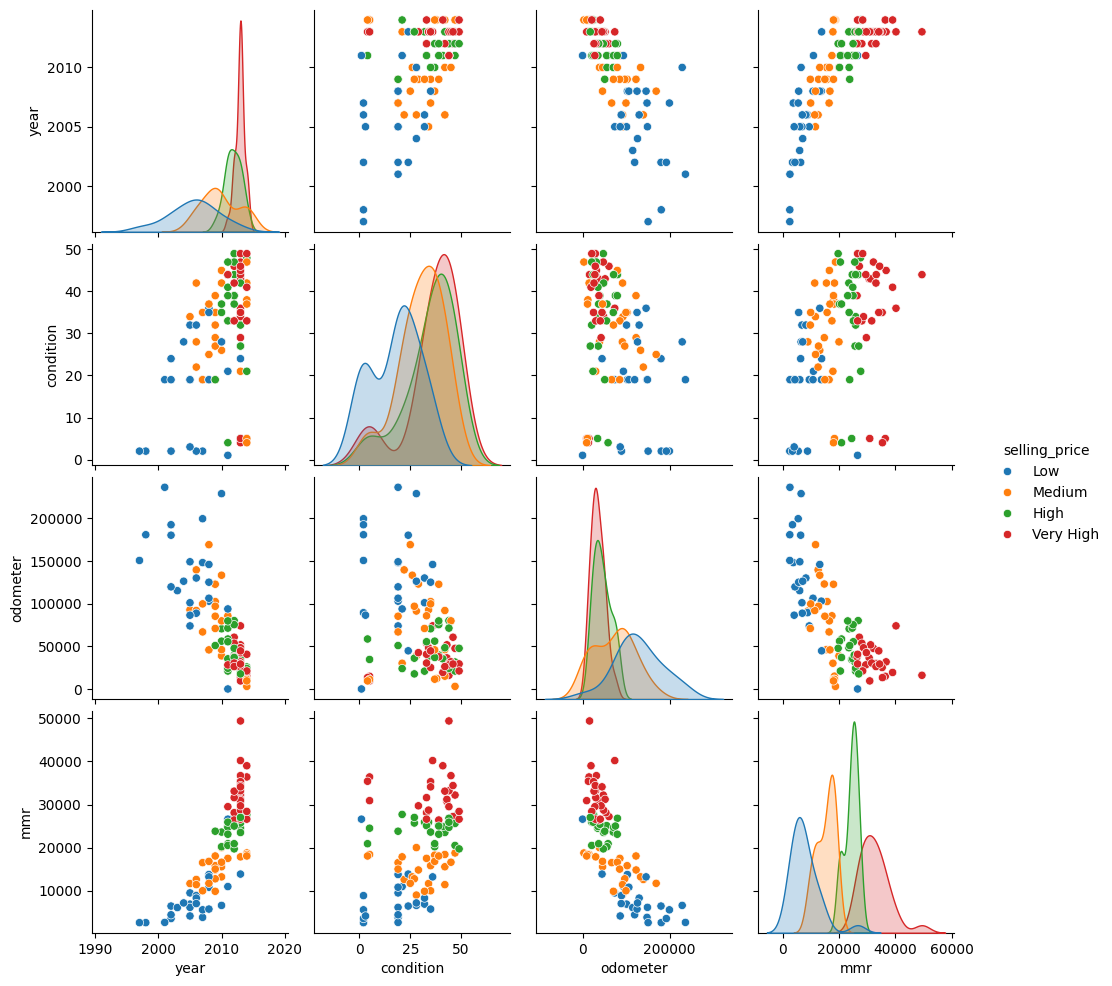

In [ ]:
pairplot_df = reservoir_sampling(100, pairplot_df)

price_bins = pd.qcut(pairplot_df['sellingprice'], q = 4, labels = ["Low", "Medium", "High", "Very High"])
pairplot_df['selling_price'] = price_bins

sb.pairplot(pairplot_df, hue='selling_price', vars=['year', 'condition', 'odometer', 'mmr'])



plt.show()
pairplot_df = final_df[['year', 'trim', 'body', 'condition', 'odometer', 'mmr', 'sellingprice']].copy()

In [ ]:
pairplot_df = reservoir_sampling(5000, pairplot_df)

In [ ]:
price_bins = pd.qcut(pairplot_df['sellingprice'], q=4, labels=["Low", "Medium", "High", "Very High"])
pairplot_df['selling_price'] = price_bins

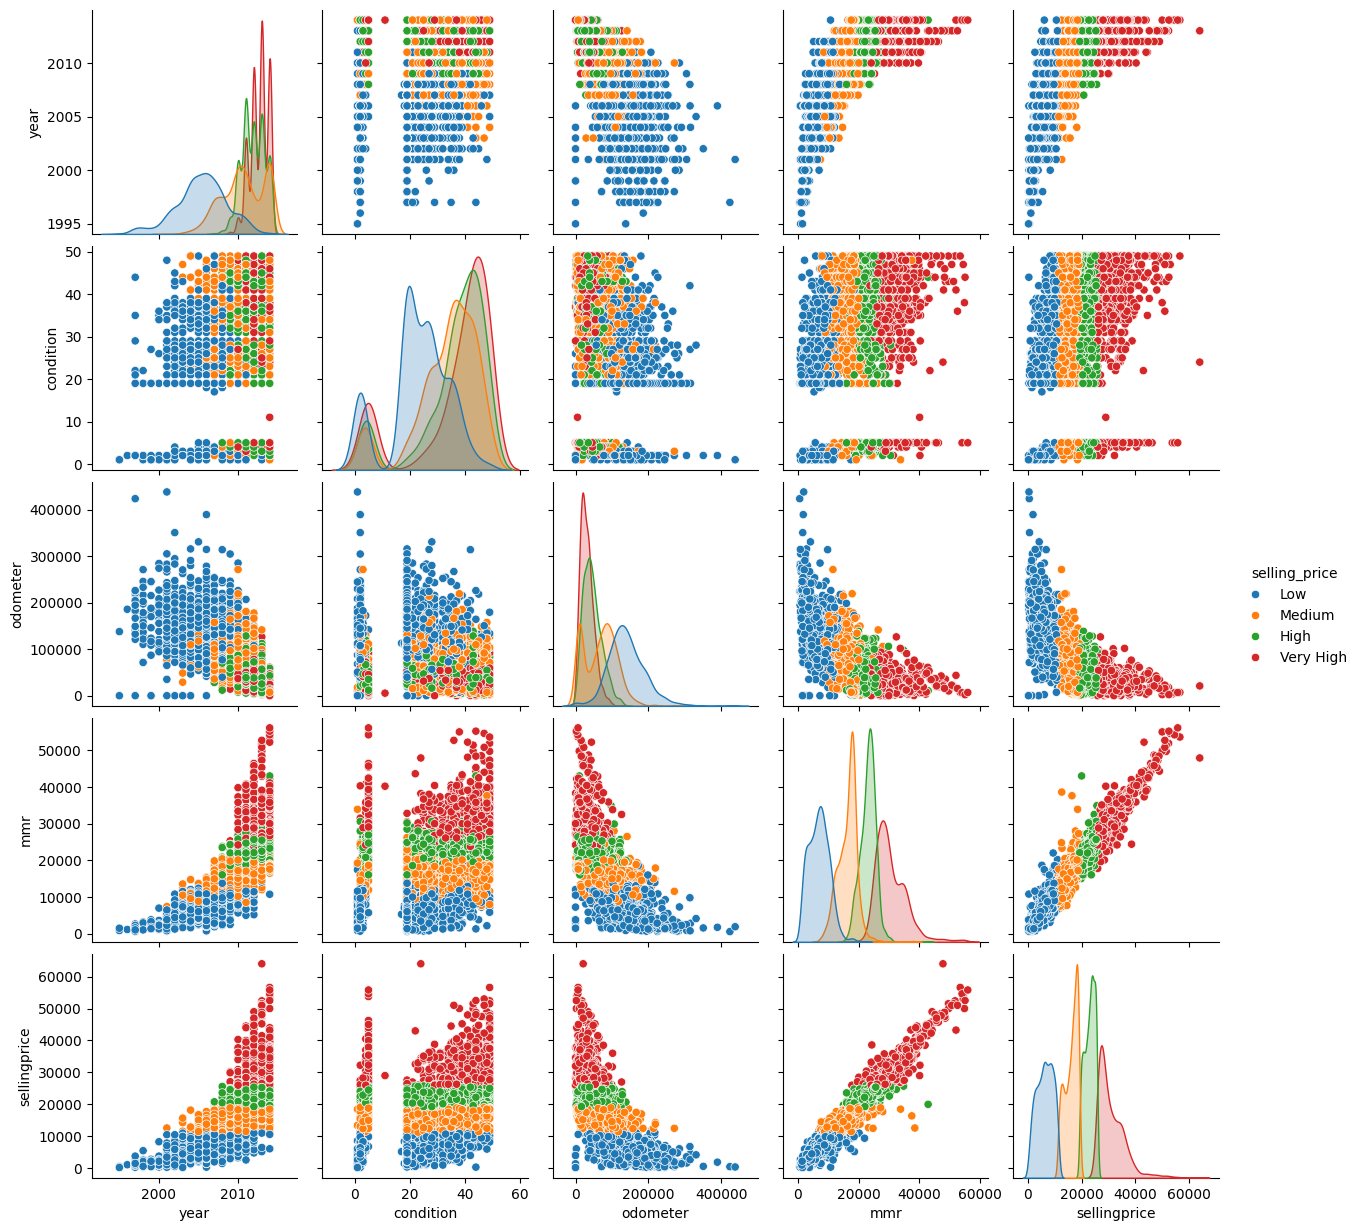

In [ ]:
sb.pairplot(pairplot_df, hue='selling_price', vars=['year', 'condition', 'odometer', 'mmr', 'sellingprice'])

In [ ]:
pairplot_df = final_df[['year', 'trim', 'body', 'condition', 'odometer', 'mmr', 'sellingprice']].copy()

In [ ]:
columns_of_interest = ['year', 'trim', 'body', 'condition', 'odometer', 'mmr', 'sellingprice']
cleaned_df = final_df.dropna(subset=columns_of_interest)

In [ ]:
cleaned_df = reservoir_sampling(14479, pairplot_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'X' is not defined

In [ ]:
def LpDistance(xq, xi, p):
    temp = 0
    for i in range(len(xq)):
        temp += abs(xq[i] - xi[i])**p
    return temp ** (1/p)


def knnclassify(test_data, training_data, training_labels, K = 1):
    assignedLabels = []
    for i in range(len(test_data)):
        distance = []
        for j in range(len(training_data)):
            distance.append((LpDistance(test_data[i], training_data[j], 2), training_labels[j]))
        distance = sorted(distance, key=lambda x: x[0])
        kneighbors = []
        for k in range(K):
            kneighbors.append(distance[k][1])
        assignedLabels.append(sum(kneighbors)/len(kneighbors))
    return assignedLabels

In [ ]:
all_vals = cleaned_df[['year','condition', 'odometer', 'mmr']].values
all_labels = cleaned_df['sellingprice'].values

In [ ]:



cleaned_df.fillna(cleaned_df.mean(), inplace=True)


cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cleaned_df.fillna(cleaned_df.mean(), inplace=True)


x = cleaned_df[['year', 'condition', 'odometer', 'mmr']].values
y = cleaned_df['sellingprice'].values


X_train, C_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)

predicted_values = knn.predict(X_test_scaled)
errors = predicted_values - y_test


errors = abs(errors)


print(predicted_values, y_test)


TypeError: Could not convert ['XLTFX2XLTXLTLariatXLFX2FX4STXXLXLTLariatFX2FX2XLTXLTXLXLXLTXLTXLTHarley-DavidsonXLTLariatXLTXLTXLTSTXLariatKing RanchLariatLariatXLTXLTXLTXLTXLTLariatXLTLariatLariatFX4XLTXLTXLTXLSTXXLTXLTXLTXLTXLTXLTSTXXLTFX4XLTXLTXLTFX4XLTXLTXLTXLXLTXLTKing RanchXLXLTXLTXLTXLTXLTXLTXLTXLTFX2XLXLTLimitedXLTXLTXLTXLTXLTFX2FX4XLTLariatXLXLTXLTLariatLariatXLTXLTLariatLariatLariatXLTXLTXLTHarley-DavidsonXLTXLXLTLariatLariatLariatXLTLariatLariatLariatXLXLTXLLariat LimitedFX2LariatXLTXLTLariatXLTXLTXLTXLTXLTLariatXLLariatFX4LariatLariatKing RanchSTXXLTXLPlatinumXLTXLTFX4XLTXLTXLXLTXLTSTXXLTXLTLariatXLTXLTFX4XLXLLariat LimitedXLSTXFX4LariatXLTPlatinumXLTLariatXLTXLTFX4XLFX4PlatinumFX4SVT RaptorXLTXLTXLTXLTXLTFX4XLXLTXLTXLXLTPlatinumXLXLTSVT RaptorXLTLariatFX4XLTXLXLTFX4XLXLTLariatXLTFX4XLTXLTXLTXLTXLTXLXLSTXLariatXLTXLTLariatLariatXLTSTXLariatXLTFX4XLTHarley-DavidsonLariatXLTFX2FX2Harley-DavidsonFX4LariatKing RanchLariatXLTFX4FX4XLTXLTXLFX4XLTFX4XLTXLTXLTXLTSVT RaptorLariatXLTPlatinumSVT RaptorHarley-DavidsonLariatHarley-DavidsonXLTPlatinumXLTLariatLariatPlatinumXLTPlatinumXLTPlatinumXLTXLTXLXLTLariatXLTXLTXLTXLTXLTKing RanchXLTLariatXLTXLTXLTHarley-DavidsonXLSTXXLTXLTXLTFX2LariatLariatXLTXLTXLTXLTXLTXLTXLTXLTXLXLTFX4FX4PlatinumXLTXLTXLTXLXLXLTLariatXLTLariatXLXLXLXLTLariatXLTXLTXLTKing RanchXLTFX4XLTLariatFX4LariatXLTXLTXLKing RanchXLSTXXLTLariatXLTXLFX4FX460th AnniversaryXLTXLXLKing RanchFX4XLSTXFX4XLTXLTXLTXLXLKing RanchXLTXLTXLTLariatLariatSTXXLTXLSTXSTXXLTFX4XLTXLTXLT60th AnniversaryXLTXLTSTXSTXXLTXLXLXLTXLTXLTXLTSTXXLTXLTXLTXLXLTXLXLXLXLXLTKing RanchXLTXLTKing RanchXLTXLFX4LimitedXLXLTLimitedPlatinumXLTXLTXLXLSTXXLTPlatinumXLXLTXLXLPlatinumXLTXLXLTSVT RaptorXLXLTFX2XLLimitedLariatXLXLXLTSTXXLTXLTXLSVT RaptorXLTXLTXLLariatLariatXLTXLXLTFX4XLTLariatFX2LariatXLTKing RanchXLXLTFX4LariatLariatXLLariatXLTXLTXLTXLTXLXLTXLTSTXXLLariatXLTLariatXLTXLTXLLariatXLTXLTLariatXLTXLTFX4XLTLariatXLTLariatLariatLariatXLXLTXLXLTXLTXLTXLTKing RanchKing RanchXLXLTXLTSTXXLTSTXXLSTXLariatXLTLariatFX4King RanchKing RanchFX4XLTLariatFX4XLTXLTLariatXLXLTLariatXLTXLXLTXLTXLTXLTXLTLariatXLTXLTXLXLTLariatFX4XLTLariatXLTXLTXLTXLTLariatXLXLTXLTXLTSTXKing RanchXLTXLTXLTXLTXLTXLTXLTXLSTXSTXLariatSTXXLTXLTXLTXLTXLXLTXLTXLXLTXLSTXFX4LariatLariatFX4XLTXLXLTXLTFX4XLLariatFX4XLTLariatXLSTXSTXXLXLTFX4FX4LariatXLTXLTXLTLariatXLFX4XLTXLTXLTXLTXLTXLFX4XLTFX4LariatXLTXLTLariatFX4STXXLFX4XLTLariatLariatLariatLariatXLTSTXFX4FX4FX4FX4LariatXLTXLTXLTXLTXLTXLTLariatXLTLariatXLTXLTLariatLariatFX4FX4FX4FX4XLTFX4LariatLariatLariatXLTXLTXLTXLXLTXLTXLTXLTXLXLLariatXLXLTXLTSVT LightningXLTLariatXLTXLTXLTXLLariatLariatXLTXLXLXLTKing RanchXLTXLTXLXLXLTKing RanchLariatXLTXLLariatLariatXLTKing RanchXLTKing RanchXLLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLLariatLariatXLTXLTXLTXLTXLTLariatLariatXLKing RanchXLTLariatLariatLariatXLLariatXLXLXLTXLTXLXLXLTLariatXLTXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLLariatLariatLariatXLTXLXLXLXLTFX2XLXLTXLTXLTXLTXLTXLTXLXLXLTXLTXLTXLXLTFX4STXFX4FX4XLTXLTXLTXLXLTLariatXLTXLTLariatXLTLimitedXLTPlatinumXLXLXLTXLTSVT RaptorKing RanchLariatXLTXLTSVT RaptorFX4XLTXLTXLTLariatFX4XLTXLXLTFX4XLTXLTXLTXLTXLTXLXLLimitedSVT RaptorXLTXLTLariatFX4PlatinumPlatinumFX4XLFX2LariatXLLariatFX4XLTSVT RaptorXLTSVT RaptorLariatXLFX4XLTXLTXLXLSTXXLTXLTPlatinumXLTSVT RaptorXLTLariatFX2PlatinumXLTPlatinumFX4LariatXLFX4XLFX4XLXLTLariatLariatPlatinumLariatLariatFX4XLTXLTSVT RaptorXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSVT RaptorXLTXLTXLTXLTXLTLariatXLTPlatinumXLXLTXLTXLTXLXLTXLXLTXLTLariatPlatinumXLTHarley-DavidsonXLTLariatXLTSTXXLTXLTXLTSTXXLTXLTXLKing RanchXLTXLFX4XLTXLTXLFX4XLTXLXLTSVT RaptorXLTXLTXLTXLTLariatXLTXLTXLTXLTXLTXLXLXLXLTLariatXLTXLTXLKing RanchLariatKing RanchFX4FX4XLXLTXLTLariatXLTXLTXLTXLTXLTXLTXLTLariatXLTXLLariatXLXLTXLTXLTXLTXLTXLXLTSTXPlatinumFX4XLXLTLariatPlatinumXLTXLTXLXLSTXKing RanchXLTXLTFX4XLTXLLariatXLTXLTXLXLXLTFX4PlatinumXLTXLTPlatinumXLTXLTPlatinumXLXLTXLTSVT RaptorXLTXLTXLTXLFX2XLTFX4STXFX4XLLariatFX4FX4XLXLTXLTXLTXLTFX4XLTXLXLTPlatinumXLTXLXLTXLTPlatinumXLHarley-DavidsonXLTXLTXLXLTXLTXLXLTFX4XLXLTXLLariatLariatFX2XLTXLTXLFX4XLTXLLariatXLTSTXXLTLariatFX4King RanchSTXXLTFX4XLTSTXSTXSTXXLTFX4XLTSTXXLLariatXLFX4XLTXLTHarley-DavidsonXLTXLXLFX4XLTXLTXLTXLTXLTXLTXLTXLTKing RanchXLTLariatXLTLariatXLXLTLariatXLTXLTFX4XLTFX4XLXLTXLTXLTXLTFX4FX4XLTXLTXLTXLTXLTLariatFX4XLTLariatXLTXLFX4XLTXLTXLTLariatXLTLariatXLTLariatLariatLariatLariatXLXLTXLTLariatLariatFX4XLTXLTLariatXLSTXXLTXLTXLTXLTSTXXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTFX4XLTXLTPlatinumXLTKing RanchXLTXLTXLXLTFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTXLTXLTXLTXLTLariatXLTXLTXLTXLTXLXLTXLXLXLTXLTXLXLTXLXLXLLariatLimitedXLTLariatXLTXLTXLTXLTXLTFX4FX4XLXLTXLTKing RanchLariatXLTFX4PlatinumXLTXLTXLXLTXLTXLTXLTFX4XLTXLTXLTXLTXLTXLXLTXLTLariatXLTXLTFX4SVT RaptorXLTXLFX2XLTXLTFX4XLTXLTXLTLariatXLTPlatinumXLTXLTLariatXLTFX4FX4XLTPlatinumXLTXLTFX4XLTXLXLTXLTSVT RaptorXLXLTXLTXLTLariatXLTPlatinumFX4PlatinumXLXLTXLFX4LariatXLTLariatXLXLTLariatXLTLariatLariatXLTLariatFX4XLTXLTFX4XLTXLTLariatXLXLTXLLariatFX4XLXLXLTXLTXLTXLTXLXLTPlatinumFX4LariatXLTLariatPlatinumXLTLariatLariatXLTXLTLariatXLTLariatFX2XLTXLTXLTXLTFX4XLTXLTXLTXLTSTXXLTXLTLariatPlatinumXLTXLTXLTXLTXLTXLXLTXL60th AnniversaryXLTXLXLTXLTFX4XLTXLTXLXLTXLTLariatLariatXLTSVT LightningXLTXLXLTXLTXLTLimitedFX4XLTXLTXLTXLTXLTXLKing RanchXLTXLPlatinumXLTXLXLTXLXLTXLLariatFX4FX2STXLariatXLTXLTLariatXLFX4LariatXLTLariatLariatXLTXLTXLTXLXLTXLTFX2XLTFX4XLTXLTXLTSTXXLTXLTXLLariatXLTXLTXLFX4XLFX4FX4FX4XLTSTXSTXLariatFX4FX4FX4LariatXLXLTLariatLariatXLTXLTXLTXLTXLTXLXLTXLXLTXLTXLXLTXLTWorkXLXLTXLTXLTXLTXLXLXLTXLXLTXLXLTXLXLXLFX4XLTXLXLXLTXLTXLTXLTXLTXLTXLTXLXLXLTXLFX4XLTXLTXLTXLTXLTFX4XLTSVT RaptorXLTFX4XLSVT RaptorXLTLariatXLTPlatinumXLTXLTXLTSTXXLTLariatSTXXLTXLTLariatXLXLXLTFX4FX4XLTXLTLariatXLTLariatXLTSTXXLTFX2Harley-DavidsonXLTSTXXLXLTSTXLariatXLXLTXLXLXLTSVT RaptorSVT RaptorXLTXLTLariatPlatinumXLTFX4XLTXLXLTXLTLariatXLTXLTLariatXLTXLTSTXXLTFX4STXXLTLariat LimitedHarley-DavidsonXLTFX4XLPlatinumXLTXLLariatXLXLTFX4XLTSTXLariatXLTLariatXLTFX4XLLariatXLTXLTFX4FX4LariatLariatLariatLariatXLTXLKing RanchXLTLariatLariatXLTXLLariatXLTLariatXLTXLTXLTSTXSTXLariatSTXXLXLTXLTXLTFX4XLTXLTSVT RaptorXLTXLTXLLariatLariatXLTLariatXLTSTXFX2XLFX4XLTFX4XLTSTXLariatFX4XLTXLTXLTXLTSVT RaptorXLTXLTLariatXLTXLTLariatFX4LariatXLTXLTFX4XLTXLLariatXLTXLTLariatSTXPlatinumXLXLTFX4XLTLariatFX4STXXLTSTXXLTXLTXLTLariatXLTXLSTXFX4FX4LariatLariatXLTFX4XLTLariatXLTLariatLariatHarley-DavidsonXLTXLTXLTSVT RaptorSTXFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTSTXXLTSTXXLTXLTFX4FX4XLTXLTLariatXLTFX4XLTXLTXLTXLTXLTFX4PlatinumXLTXLTXLTXLSTXFX4LariatXLTXLTXLTFX4XLTXLTLariatFX4STXPlatinumXLXLTFX2XLTLariatLariatXLTXLXLTXLTFX2XLTXLXLTXLTXLXLTFX4King RanchLariatFX4XLTXLTLariatXLTXLTLariatFX4LariatLariatFX4LariatSTXLariatXLTFX4FX4LariatXLTXLTXLTLariatXLTXLXLLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLLariatLariatXLTFX4XLTXLTSTXXLTLariatXLXLTFX4XLTSTXXLTXLXLTXLTXLTXLTFX4XLTXLTXLTXLTXLTXLTXLTFX4SVT RaptorXLXLXLXLXLTXLXLTXLTKing RanchXLTXLTFX2LimitedPlatinumXLTLariatXLTFX4XLTXLTXLTPlatinumXLTXLLariatXLTXLTXLTFX4LariatSVT RaptorXLTXLXLTXLTLariatXLXLXLTXLTXLTXLTXLTXLTXLXLTXLTPlatinumXLTKing RanchXLTXLXLFX4FX4LariatFX4STXXLTXLTXLTLariatXLTFX2FX2LariatFX4XLTSTXXLLariatXLTKing RanchXLLariatSTXXLTFX4XLTXLTXLTLariatFX4XLXLLariatXLTKing RanchXLTXLXLTXLXLXLTXLTXLXLTXLTXLTXLTKing RanchXLTXLTXLTXLTXLTXLTXLTPlatinumXLTXLTPlatinumXLTFX4XLTXLTXLLariatXLTLariatXLTSTXLariatXLLariatXLXLTLariatXLTXLTKing RanchKing RanchXLTPlatinumLariatXLFX4LariatXLTXLTXLTLariatFX2LariatFX4FX4LariatXLXLTXLTXLTXLTXLTLariatFX4LariatXLTXLTFX4XLTXLTLariatXLTXLTLariatPlatinumFX4XLTXLTSVT RaptorXLTXLTFX4FX4FX2XLXLTXLTFX2FX4XLTLariatFX4XLXLTXLTLariatXLLariatXLTXLTXLTXLTPlatinumXLTLariatXLTXLTXLTXLTLariat LimitedLariat LimitedXLTXLTXLTXLXLTHarley-DavidsonXLXLTXLTFX2LariatSTXPlatinumFX4XLXLTHarley-DavidsonLariatXLTXLXLTXLTFX4XLTFX2XLTXLTXLTXLXLTXLTLariatXLTLariatXLTFX4STXXLTKing RanchXLTXLXLTXLTFX4STXLariatFX4LariatXLXLTSTXXLFX2XLSTXXLXLTFX4XLTKing RanchXLXLTXLTFX4XLTXLTXLTXLXLTFX4XLFX4XLTXLTFX4XLTXLXLTXLXLTXLTXLTXLTLariatXLTSTXXLTFX4LariatXLTLariatXLTFX4LariatXLTLariatXLTFX4XLTFX4XLXLTXLTFX4FX4FX4XLTXLTSVT LightningXLLariatXLTXLTFX4XLTXLTXLTXLTXLTXLTSTXPlatinumXLTXLTXLXLPlatinumXLTXLTXLXLTXLTXLTXLTXLSTXXLTSTXXLTXLTFX2XLTFX2STXFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTLimitedXLTXLTXLTXLTSVT RaptorPlatinumXLTSTXSTXFX4LariatLariatLariatXLTXLTXLXLTFX2XLTLariatXLTFX2XLTFX2FX2XLTXLTLariatFX4LariatLariatPlatinumPlatinumXLFX4PlatinumXLTLariatXLTXLTXLTXLHarley-DavidsonLariatLariatXLTLariatFX4PlatinumXLT60th AnniversaryXLTXLLariatXLTKing RanchSTXXLFX4XLXLTXLTLariatFX4XLXLLariatXLTXLTXLTXLTXLTXLTXLTFX4FX4LariatLariatLariatFX4FX4XLTFX4XLTFX4LariatXLTLariatXLXLTXLTLariatXLLariatLariatLariatXLXLTXLTXLTFX2XLXLXLXLXLLariatXLSTXXLXLXLXLXLXLXLTXLTLariatLariatSTXXLTFX4PlatinumKing RanchSTXXLTXLTXLTLariatXLTLimitedPlatinumXLTXLTPlatinumXLTXLTXLTFX4LariatXLTXLTLariatXLTXLXLTXLTXLTFX4FX4XLTLariatXLTXLXLTXLTXLTXLTXLTXLTKing RanchPlatinumXLTXLTFX4XLTPlatinumPlatinumHarley-DavidsonSVT RaptorFX4LariatSTXLariatLariatXLLariatKing RanchFX4FX4LariatXLTKing RanchXLTXLXLTLariatFX4XLTXLTXLTFX4XLTXLTXLTLariatFX4LariatXLTXLTFX4XLTLariatKing RanchXLXLKing RanchXLTXLXLXLXLTXLTFX2FX4XLTXLTXLTPlatinumFX4XLTLariatXLTLariatFX2LariatXLTFX2XLTXLTFX2XLTLariatFX4LariatXLTLariatLariatLariatXLTXLTSTXFX4XLTXLTLariatXLTXLTXLTXLTXLTXLTSTXFX2LariatXLXLLariatXLXLLariatXLFX4LariatXLTFX4FX4XLLariatXLTLariatXLTLariatXLTXLTXLXLTFX4XLTXLTXLTFX4LariatKing RanchSVT RaptorXLTLariatXLTKing RanchXLTXLTXLTLariatLariatXLXLXLTXLTFX4SVT RaptorXLTXLTLariatLariatPlatinumXLTLariatXLTXLTLariatXLTXLTXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLTXLTXLTFX4SVT RaptorLariatXLTXLTLariatFX4XLTXLTXLTXLTLariatXLXLTXLTXLTXLTXLTXLTXLTLariatXLTSTXFX4XLTFX4LariatFX4XLTXLTXLTLariatXLTLariatXLTXLTXLTFX4XLTSVT RaptorHarley-DavidsonXLTXLTXLTPlatinumXLTXLTLariatXLTXLTXLXLTLariatXLTXLTXLTXLTXLXLPlatinumXLTSTXLariatSTXXLXLTSTXSTXXLTXLXLT60th AnniversaryFX4STXXLTXLLariatXLLariat60th AnniversaryXLTXLXLLariatXLTXLTXLTXLTXLTLariatXLTKing RanchXLTXLTFX4XLTSTXKing RanchXLTLariatLariatXLXLTSTXXLTKing RanchXLXLLariatXLTXLTFX4LariatLariatXLTLariatXLTXLTXLTXLLariatXLTXLTLariatKing RanchXLTLariatXLTLariatLariatXLTLariatXLKing RanchXLTXLTXLXLTXLTXLLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLXLXLXLSVT RaptorXLTXLXLXLXLTXLTXLTXLXLXLTXLFX4XLTXLXLXLTSTXXLTXLTLimitedFX4XLTXLTXLTXLTXLTFX4XLTFX4FX2STXXLTXLTXLTSTXFX4XLTLariatXLTLimitedSTXKing RanchXLTXLTXLTFX4XLTLariatXLTXLTXLTXLTXLTXLTXLLariatPlatinumXLTXLTXLTXLTFX4XLTLariatXLTXLTXLTLariatLariatLariatKing RanchXLTXLTPlatinumLariatXLTXLTXLTXLTFX4XLTXLTFX4LariatPlatinumLariatXLTXLTXLTSVT RaptorLariatLariatXLTXLTFX4XLTXLTXLXLTXLTXLTXLTXLTXLXLTFX4LariatXLTXLTFX2XLTXLTXLTLariatFX4FX4FX4LariatLariatXLTXLTXLTXLTPlatinumXLTXLTXLTSTXFX4XLTXLTXLTLariatXLTXLTXLTXLTLariat LimitedXLTXLTXLTSVT RaptorFX4Lariat LimitedXLTXLTFX4XLTFX4XLXLXLTPlatinumXLPlatinumLariatXLTXLTLariatHarley-DavidsonXLTXLTXLTXLTPlatinumLariatXLTPlatinumLariatSTXFX4LariatHarley-DavidsonPlatinumXLTFX4LariatXLTFX4XLTSTXKing RanchPlatinumSTXXLTFX4XLXLXLTXLTXLKing Ranch60th AnniversaryLimitedXLTXLLariatXLTXLTXLKing RanchFX2XLTXLFX2XLTXLTXLTXLTXLXLTXLXLTLariatSTXXLTLariatLariatLariatLariatKing RanchXLTLariatXLTSTXXLTXLTLariatLariatLariatXLTLariatFX4FX4XLTXLXLTXLTXLTXLTXLTLariatXLTXLTXLTXLTXLTLariatFX4XLTFX4XLTKing RanchXLTXLTLariatFX4STXLariatXLTFX4XLTFX4LariatXLTXLTXLXLTHarley-DavidsonXLTXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatLariatXLTXLXLTLariatXLXLXLXLXLXLXLXLXLXLXLXLXLFX4XLXLXLXLLariatXLXLXLXLTXLSVT RaptorLariatXLXLTXLXLXLXLXLXLXLXLXLXLXLXLXLTFX4XLXLXLXLKing RanchXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLXLTXLTXLTXLTXLTFX4STXXLTXLTXLXLTLariatXLTSTXPlatinumXLXLTXLTXLTFX4King RanchFX4XLTFX4XLTXLTSVT RaptorPlatinumXLTKing RanchXLTXLTLariatLariatFX4King RanchFX4XLTPlatinumXLTKing RanchXLTXLTXLTFX2LariatXLTKing RanchXLTFX4FX4LariatFX4XLTXLXLTXLTPlatinumXLTXLTXLTKing RanchLariatXLTFX4XLTFX4XLFX4FX4FX4XLTXLTPlatinumXLTLariatSTXXLTFX4SVT RaptorXLTXLTSTXXLTXLTXLTLariatHarley-DavidsonKing RanchFX4STXSTXLariatFX2XLTPlatinumPlatinumFX4XLTSVT RaptorSTXPlatinumXLTPlatinumLariatXLTFX4FX4XLTXLTXLTLariatXLFX2XLTXLXLTXLLariatLariatKing RanchXLTLariatXLTLariatKing RanchXLTXLTXLTXLTXLTXLTLariatXLTLariatFX4LariatXLTFX4FX4XLTLariatXLTLariatXLTXLTHarley-DavidsonXLTXLTXLTXLTLariatXLTLariatXLTXLTXLTXLTXLTFX2XLTFX2FX4SVT RaptorXLTLimitedXLTXLTLariatFX4STXFX4XLTXLTXLTXLXLTSVT RaptorXLTXLTXLTSVT RaptorLariatXLXLTLariatXLLariatXLTLariatXLTXLTXLTXLTFX4XLTXLTHarley-DavidsonXLTPlatinumXLXLTLariatXLTFX4XLXLTXLTSTXXLTXLTXLXLXLTXLTFX4XLTFX4XLTXLTXLTLariatLariatLariatXLXLLariatXLSTXFX4XLTXLTXLTXLTXLTXLTSTXSTXXLXLTLariatXLTXLTXLTXLXLTFX2FX4FX2FX4XLXLTPlatinumXLTXLTXLTXLTXLTXLTFX4XLTPlatinumXLTXLTFX2LariatFX2XLTXLTXLTXLTXLTSTXXLTPlatinumFX4LariatXLSTXLariatLariatXLXLTLariatXLTXLTXLTXLTXLTXLTXLXLTXLLariatLariatXLFX4LariatXLTFX2King RanchXLTLariatXLTFX4PlatinumFX2XLTXLFX2LariatXLTXLTLariatLariatSVT RaptorLariatLariatLariatLariatPlatinumXLTXLTXLTLariatXLTHarley-DavidsonFX4XLTXLTXLTXLTXLTXLXLTXLTLariatXLXLTXLTXLTXLTXLTXLLariatLariatXLTXLPlatinumXLTLariatLariatXLTXLTLariatFX4XLLariatXLLariatXLTXLTXLTXLTXLTSTXXLTXLTXLTFX4XLTXLTLariatXLTSVT RaptorFX2XLTFX4LariatXLTXLTXLTFX4XLTXLTXLTXLTXLTLariatLariatXLTXLTPlatinumLariatXLTXLTFX4XLTXLXLTXLTXLFX2FX4XLTXLTFX4XLTXLTXLFX4FX4XLTXLXLTLariatXLTLariatFX4XLTXLTLariatXLTSTXXLTXLTXLTXLXLTFX2XLXLTXLTXLXLTXLTLariatSTXXLXLXLTLariatXLXLXLXLXLXLXLXLXLXLTXLTXLTXLTXLTXLTXLLariatXLTPlatinumXLTFX4XLTFX4XLTSTXKing RanchSVT RaptorXLTXLKing RanchXLTLariatXLTFX4XLTLariatXLTXLTFX4FX4LariatXLTXLTXLTXLTXLTXLTXLTSTXXLTFX4LariatPlatinumLariatFX4XLTXLTXLTXLXLTSTXXLTXLTXLTLariat LimitedXLTXLTXLXLFX4XLTXLTXLTKing RanchFX4King RanchFX4STXXLTFX4XLTFX4LariatFX4XLTXLTLariatFX4XLTXLTXLTXLTXLFX4FX4XLTFX4LariatLariatLariatLariatLariatFX4LariatLariatPlatinumLariatSTXXLTXLTLariatXLTXLTXLTSTXXLTXLTXLTXLTLariatFX4FX4PlatinumLariatXLTFX4STXPlatinumFX4FX4XLTXLTXLPlatinumKing RanchPlatinumLariatXLTFX4XLTXLTXLTFX2XLTXLLariatLariatXLTSTXXLTXLTXLTXLTXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumLariatXLXLTXLTXLTXLTFX4FX4XLTKing Ranch60th AnniversarySTXFX4XLTFX4FX4XLTXLSTXKing RanchXLTXLTXLTFX4FX4STXXLXLLariatXLTXLLariatXLTXLTXLTXLXLTLariatFX4LariatXLXLTXLTLariatXLTXLTXLTLariatXLXLXLTLariatXLTXLFX4XLXLXLXLTXLXLTLariatLariatXLTXLTXLXLFX4XLXLLariatXLTXLSVT RaptorLariatXLTXLXLXLTPlatinumXLXLTLariatLariatFX4XLTLariatXLXLTXLTSTXXLTXLTXLTFX4XLTPlatinumXLTXLXLTLariatFX2XLTLariatFX4LariatXLXLTXLXLTXLTLariatXLTXLTXLTSVT RaptorLariatXLTXLTXLTXLTXLTXLTXLTLariatSVT RaptorXLXLTSTXXLTSTXSTXXLTXLTXLTFX4PlatinumLariatXLTLariatXLTXLTLariatSVT RaptorXLTKing RanchFX4FX4XLTXLTXLTXLTXLTXLTFX4LariatLariatXLTXLTXLTSTXXLTFX2LariatXLTXLTXLTXLTXLLariatXLSTXXLTXLXLLariatLariatLariatXLTXLXLKing RanchXLXLXLXLXLTXLTXLTXLTFX2XLTSTXFX2XLTFX4XLTXLTLariatXLTXLXLTSTXXLXLXLXLXLXLXLXLTXLTXLTXLTXLTXLXLXLTXLTXLTXLTXLXLTXLHarley-DavidsonXLTXLTFX4XLTXLTXLTXLTXLTXLLariatXLTLariatLariatXLFX4LariatXLTXLTXLKing RanchLariatLariatXLTXLXLTXLTXLXLTXLTXLTSVT RaptorFX4STXXLTSVT RaptorXLXLXLTXLXLTXLTXLTXLTLariatXLXLTXLXLTSTXXLTXLTFX4XLXLXLTXLXLLariatXLLariatXLTXLXLTXLTXLTXLXLTSTXPlatinumXLTXLXLTXLXLXLTXLTXLKing RanchFX4LariatXLXLTLariatXLXLTXLXLTXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLTXLXLXLKing RanchPlatinumFX4XLTSVT RaptorSTXXLTXLTXLTXLTLariatXLTXLTLariatXLLariatXLTXLTXLLimitedXLTXLTHarley-DavidsonFX4FX4LariatXLTLariatXLXLXLTXLTXLXLTFX4XLTXLTXLTXLTLariatSTXXLTXLTKing RanchFX2XLSVT RaptorXLXLTXLTXLTPlatinumFX4LariatFX4PlatinumXLTFX4XLTXLTXLTLariatXLTXLLariatLariatXLTKing RanchFX4FX4STXXLTXLTXLTSVT RaptorKing RanchXLXLTPlatinumLariatXLTXLTXLTXLTXLTFX4XLTLariatXLTXLTXLTFX4LariatXLTXLTKing RanchXLTXLLariatPlatinumPlatinumKing RanchXLTXLTKing RanchXLXLTLariatXLTXLFX4XLTXLXLTXLTXLTXLTFX4LariatLariatHarley-DavidsonFX4STXKing RanchXLTXLTXLTXLTFX4XLTKing RanchXLTXLTXLTXLTXLTXLLariatLariatLariatXLTXLTLariatFX4SVT RaptorXLTXLTXLTFX4XLTXLTXLTXLTXLTFX4FX4XLTFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTFX4STXFX4XLTXLTLariatLariatFX4FX4XLTXLTXLTXLTXLTXLTHarley-DavidsonXLTXLTXLTXLTXLTXLTSVT RaptorXLSTXXLXLTXLTSTXXLTXLTLariatXLFX4XLTXLTKing RanchFX4XLTXLTKing RanchLariatXLTXLXLTXLTXLXLLimitedXLXLXLXLXLXLTXLLariatXLTFX4XLFX2XLTFX4XLFX2XLTFX4LariatLariatFX4FX2XLTLariatLariatLariatXLTXLTXLTXLTXLTLariatXLTSVT RaptorLariatXLTXLTPlatinumXLTXLTXLTXLTXLTXLTLariatLariatLariatLariatLariatXLTFX4XLTFX4XLTLariatXLTFX4LariatXLTXLTLariatXLFX4XLTXLTXLTXLTXLXLTLariat LimitedXLTSTXXLTXLTXLTXLXLXLTFX2PlatinumLariatHarley-DavidsonXLLariatXLTFX4XLTXLTXLTXLTXLTXLTHarley-DavidsonXLTPlatinumFX4XLTXLTLariatXLTXLTFX4XLXLTXLTXLTXLTLariatFX4XLTLariatXLXLTLariatFX4XLTHarley-DavidsonXLXLXLTXLTXLTXLXLTXLTXLLariatXLTXLTLariatKing RanchSTXXLXLXLTFX4XLTXLXLXLTXLTXLFX4LariatLariatFX4LariatXLXLTLariatXLTXLKing RanchXLTLariatLariatXLXLXLXLXLXLXLXLXLXLXLFX4King RanchXLXLXLXLLariatXLTXLTPlatinumXLTKing RanchFX4XLTXLTFX4LariatFX4STXLariatFX4King RanchXLTXLTXLXLTXLTXLTXLTFX4XLTXLTXLTXLTFX2PlatinumXLTXLXLTXLTXLLariatXLTXLTXLTLariatXLFX4XLFX4XLTXLLariatLariatLimitedLariatLariatXLTXLTXLXLXLTFX4FX4XLTXLTXLTSVT RaptorLariatXLTXLTXLTXLTLariatPlatinumXLTXLTXLXLTLariatXLTXLTXLTKing RanchXLTPlatinumFX4LariatXLTKing RanchXLTXLTXLTXLTXLTLariatXLTFX4XLTXLTSTXXLSTXXLXLTHarley-DavidsonXLTFX4LariatXLTXLTXLTXLLariatLariatPlatinumXLTXLTFX4XLFX4XLTKing RanchXLXLTXLTKing RanchXLTLariatXLTXLTXLTLariatXLTXLTLariatXLXLTLariatFX4XLTFX4LariatXLTFX4XLTXLTXLTLariatXLTXLTXLLariatXLSTXFX4FX4XLTXLTSTXFX4FX4FX4XLTLariatLariatLariatXLXLTLariatLariatXLTXLTXLTHarley-DavidsonXLTXLXLXLTXLTXLXLXLLimitedXLXLXLXLTXLXLTSTXXLTXLTXLTXLTFX4LariatXLTFX4XLTXLTPlatinumXLTXLTXLTXLTXLTXLTXLTXLTLariatFX2FX4XLTXLTXLTXLTXLTFX4XLTLariatPlatinumXLTXLTXLTXLTXLXLTXLXLXLTXLXLTXLTSTXXLXLTXLTXLHarley-DavidsonXLTXLTXLTXLTLariatXLTSTXXLTLariatSTXLariatXLTXLTXLTPlatinumXLTXLTXLTXLTFX4XLTXLSVT RaptorFX4FX4LariatFX4FX4XLTXLTLariatXLTXLTXLTLariatPlatinumSTXXLTSTXLariatXLTXLTXLTXLTXLTXLLariatXLTXLTXLTXLTSVT RaptorFX2LariatXLTSTXLariatXLTXLTXLTXLTXLTXLTXLTPlatinumLariatXLXLTXLLariatXLTHarley-DavidsonXLTKing RanchLariatXLTXLTXLXLTXLTXLTLariatLariatFX4XLXLTLariatXLTXLLariatXLXLTXLTXLTXLTLariatXLTXLTXLTXLTKing RanchXLTLariatFX4LariatXLTXLTFX4King RanchXLTLariatXLTXLXLXLTFX4XLTSTXXLTXLTXLTXLTXLTXLTLariatLariatSTXXLTLariatXLTXLTXLTXLTLariatXLXLFX2XLTLimitedLimitedXLTKing RanchFX4LariatFX4FX4LimitedXLTXLTXLTFX4LariatXLTXLTXLTXLTLariatPlatinumXLTXLTXLXLXLTXLTXLTFX4LariatXLTXLTXLTXLTXLTXLTXLXLXLXLTXLFX4FX4XLXLTXLSTXLariatXLXLLimitedXLTXLTXLTXLTPlatinumLariatLariatXLTXLTLariatFX4XLTXLTXLTLariatXLTXLTXLXLTXLTXLTFX4XLTXLTFX4XLTXLTLariatLariatLariatLariatXLTXLTXLTXLTLariatXLTLariat LimitedXLTXLTLariatXLHarley-DavidsonFX4XLTXLTLariatFX4XLTXLTLariatFX4XLTXLXLTHarley-DavidsonFX2XLTPlatinumXLSTXFX4XLTXLTFX4FX4XLXLTXLTXLTFX4STXLariatFX2XLXLFX2XLTXLTXLXLXLTXLXLXLTLariatLariatFX4XLTSTXXLTXLTXLTXLTXLTSTXLariatHarley-DavidsonXLKing RanchLariatXLTXLXLXLTLariatBaseXLXLXLXLXLXLXLTXLXLXLXLXLXLXLXLXLXLTXLXLXLXLXLXLXLXLXLLariatXLXLXLTXLXLTXLXLFX4XLTXLTXLTFX4XLXLFX4LariatXLTFX4FX4XLTLimitedXLXLTXLTXLTXLTXLTXLTXLTXLTXLTSVT RaptorXLTXLTXLTPlatinumXLTXLTXLLariatFX4XLTXLTPlatinumFX4FX4XLTLariatXLTXLTXLXLTXLTFX4XLTXLTXLTLariatLariatXLTXLSVT RaptorLariatXLTXLTXLTPlatinumLariatXLXLFX4LariatFX4LariatXLTXLTLariatFX4XLXLTXLSTXXLTXLXLTXLTLariatFX2FX4FX4King RanchXLTFX4FX4LariatXLTLariatXLPlatinumXLTXLTXLTLariatXLTXLTXLTLariatSVT RaptorXLTLariatXLTXLXLTSVT RaptorLariatPlatinumLariatXLTLariatFX4XLTXLTLariatPlatinumFX4XLTFX4FX4LariatXLTFX4XLTXLXLTXLSTXXLTXLTXLTXLTXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4LariatXLTXLXLXLTXLTXLTXLTXLTSTXFX4XLTXLTXLTPlatinumXLTLariatPlatinumXLXLXLTXLTXLTXLTXLTXLTXLXLTFX4XLTXLTKing RanchXLTXLTLariatXLTXLTXLTLariatFX4FX4King RanchXLTFX4XLTXLTSTXXLLariatSTXXLXLTKing RanchXLFX2XLTXLTXLXLTXLTXLTFX4XLTXLXLTLariatXLXLXLTXLTXLTLariatLariatLariatFX4FX4LariatFX4LariatLariatLariatXLTLariatLariatFX4XLTFX4LariatXLTXLTXLTHarley-DavidsonLariatXLTLariatXLTXLTXLTSVT LightningXLXLTXLTXLXLTLariatLariatLariatXLXLXLXLXLTXLXLXLXLTXLTXLXLXLXLXLTXLXLXLXLTXLTXLTXLXLSVT RaptorXLTXLTXLTSTXXLTSVT RaptorXLTXLTSVT RaptorXLTXLTXLTFX4LariatXLXLXLTFX2LariatLariatLariatFX2FX4LariatXLXLSTXXLTXLTXLTXLTFX4FX4FX4XLTLariatSVT RaptorXLTXLTSVT RaptorLimitedXLTXLTXLTPlatinumXLTXLTXLTXLTXLTXLTXLTPlatinumXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTLariatHarley-DavidsonSTXSVT RaptorXLTSVT RaptorXLPlatinumPlatinumSTXKing RanchFX2XLTLariatFX4LariatLariatFX4XLTXLTXLTXLTXLTXLTFX4FX2LariatLariatXLTLariatXLTXLTXLTLariatPlatinumFX4LariatFX4LariatFX4PlatinumXLTXLTXLTLariatSTXKing RanchXLTXLTXLTXLTXLTXLTFX4XLTXLTXLTXLTLariatXLTSTXXLTXLXLTXLTPlatinumXLTXLTXLTLariatXLTXLTFX4XLTXLTXLTLariatXLTXLFX4XLTXLTPlatinumFX4STXXLTLariatLariatLariatFX4XLTLariatPlatinumXLTXLTXLTXLTLariatFX4PlatinumLariatSTXFX4XLXLTLariatLariatFX4STXLariatFX4XLTFX4FX4XLTFX4XLTXLTXLTPlatinumXLFX4LariatXLXLTLariatXLTPlatinumFX4FX4FX2FX4LariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLXLTXLTXLTXLTXLTXLTSTXXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumXLTXLTXLFX2PlatinumXLTXLSTXFX4XLTFX4XLXLTPlatinumXLTXLXLXLTLariatXLTLariatXLTXLXLTFX2Harley-DavidsonPlatinumXLXLTPlatinumLariatPlatinumLariatXLXLTPlatinumXLTXLTSTXXLTSTXXLTXLXLSVT RaptorXLXLTXLTHarley-DavidsonXLTXLSTXPlatinumSTXPlatinumFX4LariatXLTXLXLTKing RanchXLLariatXLTFX4STXLariatXLFX4FX4XLFX460th AnniversaryFX4XLXLXLTLariatXLXLTXLXLTKing RanchSTXXLXLFX4LariatXLTLariatXLTXLTXLTFX4LariatXLTXLLariatKing RanchKing RanchFX4XLTXLTFX2LariatXLLariatXLTLariatXLXLKing RanchXLTXLXLXLXLXLTFX4XLTLariatSTXXLTKing RanchXLXLTXLLariatLariatFX4King RanchXLTLariatXLTXLTXLTXLTXLTSTXFX4XLTXLTXLTXLTFX4STXXLTLariatXLXLTFX4XLFX4XLTFX4LariatXLXLTXLTFX4XLTSTXXLTXLTXLTFX4LariatLariatLariatXLLariatLariatLariatLariatXLTXLLariatXLXLTHarley-DavidsonXLTXLTHarley-DavidsonKing RanchXLTXLTXLTXLTXLTXLTXLTXLTXLLariatXLTXLTXLTXLTXLXLTXLXLTXLFX4XLXLTXLTKing RanchXLTXLFX4XLXLTXLTXLFX4XLXLXLTFX4XLTLariatLariatXLTXLLariatXLTXLTXLTXLXLTXLTLariatXLXLTLariatXLXLTFX4STXXLTLariatXLXLTLariatXLXLTXLLariatXLXLTXLTFX4XLTXLFX4XLXLTLariatXLTLariatLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSTXXLTXLTXLTXLTXLTXLTXLTSTXXLTXLTPlatinumFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTLariatXLTXLTXLTFX4XLXLTSTXSTXXLTXLTXLTXLTLariatXLTXLTXLTFX4XLTXLTFX4XLTLariatLariatXLTFX2SVT RaptorXLTXLTFX2LariatXLTLariatSVT RaptorLariatPlatinumXLTLariatLariatSTXSTXXLTFX4XLTLariatLariatSTXXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSTXXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLTXLTXLTLariatXLTLariatXLTSTXXLTXLTLariatSTXXLTKing RanchFX4FX4XLTLariatLariatXLXLTSTXFX4FX4FX4XLTPlatinumXLSVT RaptorXLTXLTLariatXLTXLTKing RanchLariatFX4FX4LariatLariatXLTXLTLariatXLTXLTXLFX4XLTXLTLariatFX4XLXLTXLTXLXLTXLXLXLSTXXLKing RanchXLTXLTXLXLTXLTXLXLTXLXLXLTXLTXLTXLTXLTXLTXLTLariatXLTXLHarley-DavidsonPlatinumXLTXLTFX4XLTFX4XLLariatXLTXLTXLTXLTLariatXLTXLTFX4XLTXLTXLTLariatXLTXLTXLTXLTFX4XLTXLSTXXLXLXLTXLTXL60th AnniversaryXLTXLLariatXLTXLTSTX60th AnniversaryKing RanchFX4FX4LariatSTXKing RanchXLXLXLLariatXLTXLTXLTXLTXLXLXLTXLTXLLariatFX4XLTLariatFX4XLTLariatSTXSTXLariatXLHarley-DavidsonSVT LightningXLTXLTXLXLTXLTLariatXLTXLXLXLTXLXLXLXLXLXLXLXLTXLXLXLXLTXLXLFX4XLLariatXLXLTXLTXLXLTXLXLXLTPlatinumXLTXLTXLTPlatinumXLTXLTXLFX2LariatSTXXLPlatinumXLTSVT RaptorLariatLariatXLXLTLariatXLTFX4LariatXLTFX4FX2XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatLariatLariatXLTLariatPlatinumFX2LariatKing RanchLariatXLXLTXLXLTXLTPlatinumLariatKing RanchLariatXLTSTXXLTLariatXLSTXFX4LariatXLXLTXLTXLXLTXLXLTXLXLXLTXLXLXLXLXLXLXLTXLTSVT RaptorFX4XLTXLTFX4PlatinumXLTXLTXLTXLTXLKing RanchXLXLTXLTXLTKing RanchXLTLariatXLTSTXPlatinumXLTLariatXLTXLTFX4LariatKing RanchXLSTXFX4XLTXLTXLTXLTXLXLTXLTFX4XLTXLTXLTXLXLTLariatFX4XLTPlatinumXLTFX4PlatinumPlatinumSVT RaptorXLTFX4XLTXLTXLPlatinumFX4XLTXLTXLTXLTFX2XLXLTKing RanchXLPlatinumLariatLariatFX4XLTXLTXLTXLXLTXLTXLTXLTXLTXLXLTFX4LariatXLSTXXLTFX4PlatinumXLTXLTLariatXLTSVT RaptorPlatinumXLTXLTPlatinumPlatinumPlatinumXLTLariatXLTSVT RaptorPlatinumLariatXLTXLTLariatXLTXLLariatLariatLariatXLTXLXLTSTXFX2XLTKing RanchFX2XLTFX460th AnniversaryFX4XLFX4XLTLariatXLTXLTXLTXLTXLTLariatXLTSTXXLLariatXLTSTXFX4XLLariatXLTLariatXLTLariatFX4LariatXLTXLTXLTXLTXLTLariatLariatXLTXLTXLTLariatXLTXLTXLTXLTXLKing RanchXLXLTXLLariatXLTXLTXLXLTXLTXLTXLTPlatinumXLXLTFX4XLXLLariatXLXLXLXLXLTXLTXLTXLXLTXLTXLTFX2STXFX4XLTFX4STXXLTXLTLariatXLTFX4STXXLTXLTXLTLariatLariatLimitedLariatXLTFX4LimitedXLTXLTLariatLariatFX4XLTLariatXLTXLTXLTXLXLTXLTXLTFX4LariatXLXLTXLTXLTPlatinumSTXXLTFX4STXFX4LariatPlatinumPlatinumXLTXLTXLTLariatXLXLTXLTFX4XLFX4XLTFX4XLTXLFX4XLTFX4XLTXLTXLTKing RanchFX4XLPlatinumXLTXLTFX4LariatLariatXLTXLTLariatXLTXLTXLTXLXLTXLTFX4LariatXLTFX4FX4XLFX4SVT RaptorXLTXLTXLXLTXLTXLTXLTFX4FX4LariatPlatinumFX4XLTXLSTXXLTFX4LariatKing RanchXLTXLTXLTLariatXLTKing RanchXLXLTSTXXLTXLTXLTXLTSTXFX4XLXLXLTFX4King RanchXLTLariatXLTFX4XLTLariatLariatXLTLariatFX4LariatLariatXLTXLTXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTFX4XLTSVT RaptorLariatLariatXLTXLTXLTLariatXLTXLTPlatinumXLTLariatLariatSVT RaptorXLTFX4King RanchXLTXLTLariatFX4XLXLTXLTSTXXLTFX4FX4XLTXLTXLTXLTXLTXLTSTXFX4FX4XLTFX4XLTFX4XLTFX4LariatXLTXLTSVT RaptorXLFX4FX4XLXLTXLTFX4XLTXLXLTFX2Harley-DavidsonXLTXLFX2XLXLTLariatXLTFX4XLXLXLXLXLXLXLXLTXLXLXLXLXLXLXLXLXLTLimitedXLTSTXFX4XLTXLTPlatinumPlatinumLariatFX2XLTLariatLariatXLTXLLariatXLTXLTXLTXLTLariatXLXLTLariatSVT RaptorXLTLariat LimitedXLTXLTXLTXLTXLTXLTLariatLariatXLXLTPlatinumXLFX4XLTFX2XLTSVT RaptorFX4XLXLTFX2LariatXLTXLXLSTXHarley-DavidsonFX4FX4XLXLTXLTXLHarley-DavidsonXLTFX4XLFX4XLTXLTXLXLTXLTXLTXLXLTXLTXLTXLXLTXLTLariatXLXLTXLLariatSTXLariatFX4XLTLariatXLTXLTLariatXLXLKing RanchKing RanchLariatLariatXLTXLTLariatXLTXLLariatLariatXLTXLTXLTXLTLariatXLTXLXLLariatXLTXLXLTLariatXLXLLariatFX2XLTXLTXLTLariatFX4XLTXLSTXLariatLariatLariatSTXXLTXLXLXLTLariatXLTXLTFX4XLSTXXLTXLTKing RanchSTXXLTXLTXLTXLTPlatinumXLTXLTXLTLariatLimitedFX2FX4PlatinumXLLariatXLKing RanchXLTXLTXLTPlatinumLariatSTXSTXXLTXLTFX4XLTXLTXLTLimitedFX2SVT RaptorXLXLTXLTFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumXLXLTFX2XLTXLTLariatXLTSVT RaptorXLTFX4XLXLTXLTPlatinumXLTXLTFX2XLLariatLariatXLLariatXLTXLXLTLariatLariatSTXXLTXLLariatXLTFX4XLTXLTFX4XLKing RanchXLTXLTXLTXLTKing RanchXLTLariatFX2STXPlatinumXLTFX4XLTLariatXLTXLFX4XLTXLTFX4FX4XLTXLTPlatinumFX4XLTXLTXLXLXLFX4XLXLTFX2XLTXLTXLTXLTPlatinumXLXLTXLTLariatSTXLariatXLTLariatXLTLariatXLTPlatinumLariatXLTLariatXLTXLTXLTXLTXLTXLXLXLT60th AnniversaryLariatXLT60th AnniversaryXLTXLXLXLTFX2XLTLariatXLTLariatXLTXLTXLTXLTKing RanchXLTLariatFX4LariatFX4XLXLTXLTXLLariatXLTXLTXLTXLTXLTXLTXLTXLXLXLXLTXLTXLXLXLXLXLXLTXLXLXLTSTXXLXLXLXLTXLTXLTXLTXLXLXLTXLXLXLXLXLXLTXLXLTXLTSTXXLTPlatinumXLXLTXLSVT RaptorXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSTXLariatLariatXLTSTXXLTFX4FX4STXFX4SVT RaptorXLTFX4FX4LariatLimitedFX4XLTXLTXLTLariatXLTPlatinumLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX2King RanchPlatinumXLTLariatFX4PlatinumXLTXLTLariatFX4XLTFX4XLTXLTXLTLariatFX4LariatXLTLariatXLTLariatPlatinumFX4LariatXLTXLTLariatFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTLariatXLFX2XLTFX2FX4XLTKing RanchLariatFX4LariatXLXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTSVT RaptorXLTFX4XLTLariatLariatXLTXLTXLTXLTSTXFX2XLTXLTFX2XLTLariatXLTXLTXLTFX4LariatPlatinumXLTXLTXLTPlatinumFX4XLTXLLariatLariatHarley-DavidsonXLTPlatinumXLXLTXLTXLTXLTFX4PlatinumXLTFX4XLTXLTFX4PlatinumXLXLTXLTXLTXLTXLTXLTXLTKing RanchXLTPlatinumXLTFX2XLXLTXLSTXXLTSTXXLTXLXLTSTXXLTKing RanchXLTXLTFX2XLLariatLariatXLTXLTXLTXLLariatXLTFX4XLXLTFX4XLTXLTXLXLTXLTXLTLariatXLTXLTLariatSTXSTXXLTFX4XLTLariatFX4XLTLariatFX4XLTFX4LariatXLTLariatXLTFX4LariatXLTXLTLariatXLTXLTXLTHarley-DavidsonXLHarley-DavidsonXLTXLTXLTSVT LightningXLTXLTLariatLariatLariatXLXLTXLTXLTXLTXLTSTXSTXXLTXLXLTXLTXLTXLXLTXLTXLXLTXLTXLXLSTXSTXXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTSTXXLTLariatXLTXLTPlatinumLimitedFX4XLTKing RanchXLTXLTFX4XLTXLTXLTLariatFX4XLTXLTXLTXLTPlatinumPlatinumLariatPlatinumXLTXLTXLTFX4XLTXLTXLXLTXLTFX4XLTXLTLariatXLTXLFX4XLTXLXLTXLXLTLariatXLXLXLXLXLXLXLXLTXLXLTXLXLTKing RanchSTXXLTXLTXLTXLTPlatinumXLTLariatXLXLTFX4XLTLariatXLTPlatinumXLTKing RanchPlatinumSVT RaptorPlatinumXLTXLTXLTFX4SVT RaptorXLTXLTPlatinumXLTXLTXLTLariatLariatXLFX4LariatFX4LariatFX4XLTLariatFX2XLTXLTXLPlatinumXLSTXFX4SVT RaptorSVT RaptorFX2XLTPlatinumXLXLTXLTXLTFX4FX4FX4LariatLariatPlatinumXLXLTFX4XLTXLFX2STXKing RanchXLXLTXLTLariatXLTXLTXLTKing RanchXLTXLXLTKing RanchLariatXLXLTXLTXLTSTXXLTXLTXLTSTXFX4XLTXLTSTXXLLariatXLTXLTXLTXLXLTXLTSTXXLFX4LariatFX4XLTSVT LightningXLTLariatLariatLariatFX4LariatLariatXLTXLTLariatXLTXLKing RanchXLXLTXLLariatXLXLXLTXLXLXLXLTXLXLXLXLXLTXLTXLLariatLariatXLXLTLariatPlatinumXLXLTXLTLariatXLXLXLXLXLLariatLimitedFX4King RanchLariatXLTLariatFX2XLTFX2FX4XLTXLTXLXLTPlatinumXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4LariatXLTXLTLariatLariatLariatFX4XLTXLTFX4LariatSTXXLTXLTKing RanchXLTXLTLariatSVT LightningXLTLariatXLTXLTSVT RaptorLariatXLTXLTFX4STXXLTXLTFX4XLTXLTFX2LariatFX4LariatXLTXLPlatinumLariatLariatLariatFX2King RanchFX4FX4XLTFX4FX4LariatFX4LariatKing RanchXLXLTXLTXLXLXLTXLTLariatXLTXLTXLTXLTXLTXLTFX4SVT RaptorXLTSVT RaptorXLTSTXLariatXLTPlatinumXLTXLTXLTFX4XLTXLTXLTXLTXLTSVT RaptorXLTXLTXLTXLXLTXLTPlatinumXLTXLTXLTKing RanchLariatXLXLFX2King RanchKing RanchXLXLTXLTXLTXLTXLXLTLariatSTXXLTXLTXLTLariatXLTXLTXLTXLTSTXHarley-DavidsonXLTLariatXLTLariatXLTXLTXLXLTXLTSTXXLTXLXLLariatXLTXLXLXLXLTXLSTXXLTXLLariatXLSTXXLTFX4XLTXLXLTXLSVT RaptorXLTXLTXLTXLTSTXXLTXLTXLTSTXXLTXLTLariatXLTSTXXLTFX4XLTXLTXLTXLTLariatFX4XLTFX4XLTFX4SVT RaptorXLTLariatXLTLariatSTXSTXXLTXLTXLTSTXSTXXLTXLTXLXLTXLTLariatFX4XLXLXLXLTLariatKing RanchLariatXLTLariatLariatSTXSTXXLTFX4XLTXLTXLTXLTXLTXLTXLXLXLXLTXLTXLTXLTXLTFX2XLTPlatinumLariatSTXKing RanchXLTXLTXLTKing RanchLariatXLXLTXLTXLTXLXLTXLTFX4XLTKing RanchPlatinumFX4XLTFX4XLTPlatinumXLTSVT RaptorXLTXLTXLTXLTXLTSTXXLTXLTKing RanchFX2XLTPlatinumLariatXLTPlatinumXLTXLTFX4XLTXLTKing RanchLariatXLTXLTXLTFX4LariatXLTXLTSVT RaptorXLTXLTXLTLariatHarley-DavidsonXLTHarley-DavidsonFX2XLTSTXXLTSTXXLTSVT RaptorXLTXLTLariatPlatinumXLTPlatinumXLTSTXXLTFX2XLTXLTXLXLXLXLTXLLariatXLTXLTLariatLariatFX4XLTXLTXLTXLTXLLariatXLXLTXLFX4LariatXLSTXLariatXLFX4XLXLLariatXLXLTXLTXLLariatXLTXLXLXLXLXLFX4FX4LariatSTXLariatXLXLLariatXLTXLXLTXLXLXLTXLTXLTXLTXLTSTXSTXXLTXLSTXXLTXLPlatinumXLTXLTPlatinumPlatinumPlatinumFX4PlatinumXLTXLFX4XLTSTXLimitedXLTFX4XLTFX2FX2XLPlatinumXLTLariat LimitedXLTFX4LariatXLTXLTLariatSVT RaptorFX4XLTLariatXLTKing RanchFX4LariatXLFX4XLTKing RanchFX4FX4XLTFX4XLTLariatXLTXLTXLXLXLTXLXLTXLLariatLariatLariatSVT RaptorXLTXLTLariatFX4XLTXLTXLTXLTFX2XLTLariatFX4XLTPlatinumXLTFX4LariatXLTSVT RaptorXLTXLTXLXLTLariatXLTXLTLariatXLTFX4LariatXLTKing RanchFX4XLTLariatFX2XLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSTXLariatXLXLXLTXLPlatinumXLTXLFX4XLTXLTPlatinumPlatinumXLTXLTXLTXLTXLTFX4XLTXLTFX4XLLariatXLXLTXLTXLTXLTXLLariatXLTKing RanchXLTXLTLariatXLTFX2XLFX4XLTXLTXLTFX4LariatXLXLTSTXXLTXLTXLXLTXLTLariatFX4XLTXLTXLTXLTLariatLariatXLTXLXLTXLXLTSTXXLTXLXLXLXLXLXLXLTXLXLTXLXLXLXLXLSVT RaptorXLXLTXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTLariatPlatinumSVT RaptorLariatXLTLariatXLTXLTXLTSTXXLTLariatXLTSTXFX4FX2Harley-DavidsonFX4LariatSVT LightningXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLTXLTHarley-DavidsonFX4XLTLariatXLTXLTSVT RaptorLariatLariatXLTSVT RaptorXLTXLTXLFX4Harley-DavidsonXLTXLTXLTKing RanchXLTXLTXLXLTXLTXLXLXLXLXLTXLTXLTXLTSTXXLTXLFX2XLFX4FX4XLSTXFX4XLXLTXLTXLTXLTFX4XLTXLTLariatXLTLimitedXLTXLTXLTLariatXLTXLTLariatFX2FX4XLTXLTXLTXLLariatFX4XLTFX4LariatLariatFX4XLTXLTXLTXLTXLTXLTSVT RaptorFX2XLTXLTSVT RaptorPlatinumLariat LimitedXLTXLTLariatXLLariatLariatFX4XLPlatinumFX4XLTLariatXLTXLTXLTXLTXLXLLariatFX2XLXLTLariatFX4XLTXLXLTXLTXLTFX4XLTLariatFX4XLTXLKing RanchLariatXLTLariatFX460th AnniversaryXLTXLXLTXLTXLFX2LariatXLTSTXXLTXLTKing RanchLariatLariatXLTXLXLTXLTXLTFX4FX4LariatXLTXLTLariatLariatXLTXLXLTXLTXLLariatLariatXLTLariatXLTXLXLTXLXLXLXLTXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLTXLTXLTSVT RaptorXLTSTXKing RanchSVT RaptorXLTXLTSVT RaptorXLTXLTLariatLariatFX2PlatinumXLTKing RanchFX4XLTLariatXLTSTXXLXLTXLTXLTXLXLTXLTLariatXLTFX4XLTKing RanchXLTXLTPlatinumPlatinumXLTFX4LariatXLTLariatFX4XLTXLXLXLXLTFX4FX4XLTFX2STXFX4LariatSVT RaptorXLTXLTPlatinumFX4SVT RaptorXLTXLTXLXLTXLTLariatLariatSVT RaptorLariatXLTXLTHarley-DavidsonFX2PlatinumXLTFX4XLTXLXLTKing RanchXLSTXXLTXLTXLTKing RanchXLTXLXLFX4LariatXLXLTLariatXLTFX4XLTXLTXLTXLTXLFX4STXLariatLariatXLTXLXLTLariatXLTSTXFX4FX4XLTXLTLariatLariatLariatHarley-DavidsonXLTXLTLariatXLTHarley-DavidsonLariatXLTXLXLTXLTXLTXLTXLTXLLariatXLXLXLXLTXLTXLXLXLXLXLXLXLXLTXLTXLXLTSTXXLXLXLXLTXLXLXLTXLXLXLXLXLXLXLXLTXLTXLTFX4XLTXLTSTXFX4PlatinumXLTLariatLariatXLTFX4LariatXLTXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLXLTXLTXLTSVT RaptorXLTSVT RaptorXLTLariatLariatXLXLLariatFX4XLTHarley-DavidsonXLTXLTLariatXLTFX4XLXLTKing RanchXLXLTXLXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTXLTLariatPlatinumPlatinumXLTPlatinumXLTXLTFX4XLTPlatinumXLTXLTLariatXLTXLTFX4XLXLTLariatXLTFX4XLTXLTPlatinumXLTXLTFX4XLTFX4LariatXLTFX4LariatLariatFX4XLTXLTLariatFX4XLTXLTPlatinumHarley-DavidsonXLTHarley-DavidsonXLXLTXLTXLTLariatXLPlatinumLariatXLTSTXXLTXLXLTFX4XLXLTFX4LariatXLXLTXLTXLTFX4King RanchXLTFX4XLTKing RanchLariatXLTXLLariatLariatFX4XLFX4XLXLTXLXLXLXLTXLTXLTXLXLFX4FX4XLTLariatXLTLariatFX4FX4LariatFX4LariatFX4XLTXLTXLTXLTXLTXLTXLTXLTLariatLimitedXLTXLTSTXXLTXLTXLTXLTXLTXLTXLTFX4XLTFX4XLTXLTPlatinumFX4FX4XLTSTXFX4XLTXLTLariat LimitedLariatXLTXLTFX4XLTFX4XLTXLTXLTXLXLTPlatinumSVT RaptorXLTXLTXLXLTXLFX4XLTSTXXLXLXLTXLXLTXLXLTXLTXLTXLTFX4STXXLTXLTXLTFX4FX4FX4XLTLariatXLTXLXLXLTSTXXLSTXXLSTXXLXLXLTXLTXLXLXLTXLTXLTKing RanchKing RanchXLTXLTXLTXLTPlatinumKing RanchLariatPlatinumXLTLariatKing RanchXLTXLTKing RanchXLTSTXXLTXLTSVT RaptorXLTLariatXLFX4XLTXLTXLTXLTXLTXLTPlatinumXLXLTFX4LariatFX4FX4LariatSTXSTXXLTXLTFX4XLTFX4FX4XLTFX4XLTXLTPlatinumXLTSVT RaptorXLTXLTXLTFX2XLTXLXLTXLTXLLariatLariatFX4LariatLariatSVT RaptorXLTXLTXLTPlatinumXLTLariatFX4XLTSVT RaptorXLTXLTLariatSTXXLTXLTLariatXLXLTLariatXLTSTXFX4XLTXLXLTXLTXLTLariatXLSTXXLXLXLTXLXLXLTXLTXLXLTXLTXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4XLTXLTXLTXLTXLTFX4XLTXLTXLTXLTSTXXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTFX4FX4XLTXLTXLTSVT RaptorSTXLariatXLTPlatinumFX4XLTXLTXLXLTXLTXLTPlatinumLariatXLTXLTXLTXLTXLTFX4XLTXLXLTFX4XLTXLXLTKing RanchFX4King RanchFX4FX4XLTXLTFX4LariatSTXXLTXLTXLTXLTXLXLTWorkXLTXLXLXLTFX4XLXLTXLTLariatLariatXLLariatLariatLariatXLLariatLariatLimitedXLTFX2XLXLTFX4LariatXLTXLTXLTLariatFX4LariatLariatXLTXLTXLTXLTSTXXLTXLTPlatinumXLTXLTLariatXLTFX4XLTFX2FX4XLTXLTKing RanchLariatXLTXLXLXLTSTXXLTXLTSTXXLTXLTXLTXLSTXLariatXLTXL60th AnniversaryLariatXLTXLTXLXLFX4FX4XLTXLTFX4XLXLTLariatSTXXLTXLTLariatXLTXLTLariatXLLariatXLTXLTXLXLXLXLTXLLariatXLXLXLXLXLXLPlatinumXLXLXLTSTXXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTXLTXLTXLTFX4PlatinumLariatXLXLTXLTSTXFX2LariatLariatXLLariatXLTXLTFX4King RanchXLTFX4King RanchKing RanchXLTXLTXLTXLLariatXLXLXLXLXLTXLTXLTXLTXLTSVT RaptorFX4LariatXLTXLTXLTXLTSVT RaptorXLTXLTXLTXLTLariatXLTXLTXLTLariatFX4XLTXLTPlatinumSTXSTXFX4King RanchXLXLXLTLariatSVT RaptorXLFX4XLXLFX4PlatinumXLTXLTFX4XLTLariatLariatXLTXLSVT RaptorPlatinumPlatinumXLXLTXLTXLTXLTXLTFX4LariatLariatLariat LimitedXLTFX2XLTFX4XLTXLTLariatFX4FX4XLTLariatLariatLariatXLTXLTXLTLariatXLTXLTLariatXLTXLTSVT RaptorLariatXLTXLTXLTPlatinumXLTXLXLTXLTXLTKing RanchLariatXLTXLXLTXLTXLSTXXLTLariatLariatFX2XLTXLXLTXLLariatLariatXLTXLTSTXLariatXLTLariatXLTXLTLariatXLTLariatFX4XLTXLTXLTXLTXLXLXLSTXXLXLXLTXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLimitedXLTXLTXLTXLTXLTLimitedPlatinumXLTLariatLariatFX2XLLariatXLLariatLariatLariatFX2LariatXLTXLTSTXXLTXLTXLTSVT RaptorXLTXLTSTXXLTXLTPlatinumFX4XLTFX4LariatLariatXLTLariatXLTXLFX4XLTXLTXLTLariatXLTSVT RaptorFX4LariatXLTXLTFX4FX4FX4XLTXLTFX4STXXLTSTXFX4LariatFX4XLTXLTXLTXLTXLTXLTXLTXLTLariatXLTFX4LariatXLTLariatXLTPlatinumXLTXLTFX4XLTXLFX4LariatXLTLariatXLXLFX4FX4XLXLTLariatFX2XLTXLXLXLXLXLXLTXLTPlatinumXLTXLXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTXLTLariatXLTXLTFX4XLTLariatXLLariatXLXLTXLTXLTFX4FX4LariatXLTXLTXLTXLTHarley-DavidsonXLTFX4STXXLTXLLariatFX4PlatinumXLTXLTFX4FX4PlatinumXLTFX4PlatinumKing RanchKing RanchXLTXLTXLSTXXLTXLTXLTXLTFX4FX4FX4FX4XLTLariatXLTLariatFX4XLTXLTXLTLariatXLTXLTXLTFX2LariatXLTSTXXLTFX4XLTXLTXLXLTXLTXLTXLTXLTXLTXLSTXSTXFX4XLTSVT LightningXLLariatXLTXLTXLTXLXLTXLXLSTXXLTXLXLTXLXLTXLXLTXLXLXLTXLXLXLXLXLXLTXLXLXLXLXLXLTFX4XLXLXLTXLTFX4LariatXLTLariatLariatLariatXLTXLTXLTXLTXLTSVT RaptorXLTFX4LariatSVT RaptorSVT RaptorXLTXLTXLTXLTXLTLariatXLTXLTFX4XLTFX4LimitedLariatXLTFX4PlatinumFX4XLTXLTFX4LariatXLTXLTXLXLTXLXLTFX4XLXLTXLTFX2XLTLariatXLTPlatinumXLTXLTXLXLTXLTSVT RaptorXLTFX4LariatLariatXLTXLTXLTFX4LariatPlatinumXLTXLTXLTXLTKing RanchXLTLariatXLTSTXXLTXLXLTXLTFX4XLLariatXLTXLTXLTXLXLLariatXLTXLTXLTFX4XLTXLTXLXLTXLTXLXLTLariatXLTSVT LightningFX4LariatFX4LariatXLTXLXLXLXLXLXLXLTLariatXLXLXLXLXLXLXLTXLSTXXLXLXLTXLTXLTXLTSTXXLTXLTXLTLariatXLTXLTFX4XLTLariatXLTXLTLimitedLimitedXLFX4XLLariatXLTXLTXLTSTXXLTXLTFX4FX4LariatPlatinumXLTXLTXLTXLTFX4LariatLariatXLTFX4XLTXLTLariatXLTXLTLariatXLTXLXLXLTLariatFX4XLXLTLariatLariatXLTXLTXLXLLariatFX4FX4LariatFX4LariatFX4LariatFX4FX4LariatFX4FX4LariatLariatLariatSTXXLTXLTXLTXLTXLTFX4FX4XLTFX4FX4XLTFX4XLTPlatinumXLTLariatXLTXLTXLTFX4XLTXLTXLTLariatXLTXLTXLTXLXLTXLTXLTXLTXLTXLTLariatXLTXLFX4LariatSVT RaptorFX2XLTFX4LariatSTXLariatXLTFX4FX4XLTFX4LariatKing RanchXLTXLTXLTXLTSTXXLTLariatXLTLariatFX4XLTXLTXLTFX4FX4XLTSTXXLTFX4LariatLariatXLTXLTFX4FX4XLTLariatXLXLTXLFX2FX2XLXLXLTSTXXLTXLXLTXLTXLXLTXLXLTXLXLTXLTXLFX4XLTFX4King RanchFX4King RanchFX4King RanchSTXXLTPlatinumLimitedSVT RaptorXLTXLTXLTSTXXLTXLTSVT RaptorXLTXLTSVT RaptorXLTLariatPlatinumXLTPlatinumXLTXLTXLTXLTXLXLTXLTXLTPlatinumPlatinumLariatFX4XLTSVT RaptorLariatXLTFX4LariatLariatFX4XLTXLTXLTXLTLariatLariatXLTXLTXLLariatSVT RaptorXLTLariatXLTLariatXLTKing RanchXLTLariatXLTFX4XLXLTLariatFX4Harley-DavidsonXLTLariatXLLariatXLXLXLFX4XLTXLTXLTXLTLariatLariatXLTLariatFX4King RanchXLFX4XLTFX4LariatXLTFX4XLTSTXLariatXLTXLTXLTXLTXLTXLTXLTLariatXLTXLTFX2PlatinumXLPlatinumXLPlatinumXLTXLTXLTXLTXLFX4XLTSTXXLLariatLariatSTXLariatXLXLTXLXLTXLTXLTXLXLTLariatXLTXLTXLLariatSTXLariatXLTXLTXLTXLTFX4XLTXLLariatXLXLTSVT LightningXLLariatXLXLXLXLXLTSTXXLSVT RaptorXLTXLTXLTKing RanchXLTKing RanchLimitedLariatXLTFX4XLTLariatXLTXLTFX4XLTHarley-DavidsonXLFX4XLTXLTXLTXLTXLXLXLTXLTPlatinumPlatinumXLTHarley-DavidsonXLTSTXLariatXLTXLTKing RanchLariatLariatXLLariatXLTFX4XLTXLTXLTPlatinumXLTXLTLariatXLTXLTXLLariatSTXPlatinumHarley-DavidsonFX4XLTPlatinumXLTLariatXLTXLTXLTLariatXLTXLTXLTFX4XLTXLTXLTXLXLTXLTSTXXLTXLTXLTXLTFX4XLTFX4SVT RaptorLariatFX4XLXLXLXLTXLTXLTXLTLariatFX4FX4XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatXLTFX4XLTXLTXLTXLXLTXLTXLTXLXLTXLTXLXLTXLXLTXLLariatXLTXLTFX4XLLariatFX4XLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLXLTLariatXLTSTXXLTXLTSVT RaptorXLTXLTPlatinumXLTSVT RaptorXLTXLTXLTXLTLariatLariatFX4PlatinumFX4LariatXLPlatinumFX4XLTPlatinumXLTFX4XLFX4FX4King RanchXLT60th AnniversaryXLTXLTKing RanchXLTLariatXLTXLTXLTXLTXLTXLTLariatXLXLTLariatLariatSTXXLTXLFX4LariatXLTXLXLTLariatXLLariatXLXLFX4XLXLXLXLTXLTXLFX4STXLariatXLTHarley-DavidsonSVT LightningXLXLLariatXLXLTXLTXLTXLXLXLXLXLXLXLTXLXLTXLXLXLFX4XLXLXLXLSVT RaptorXLTPlatinumXLTXLTXLTXLTFX2XLTLariatXLTLariatXLTLariatFX4FX4XLTPlatinumPlatinumKing RanchFX4XLTXLTLariatXLTXLTFX4XLTXLTXLTLariatXLTLariatLariatXLTXLXLTLariatFX4XLTSVT LightningLariatXLTXLTFX4STXXLTFX4XLTXLTXLTXLTXLTXLTXLSTXLariatXLTLariatFX4XLTFX4FX4XLTXLTLariatXLTFX4FX4XLXLTPlatinumXLTFX4PlatinumXLTSVT RaptorXLTSVT RaptorXLSVT RaptorXLTHarley-DavidsonXLTXLXLTHarley-DavidsonFX4LariatFX4LariatHarley-DavidsonLariatXLTXLTPlatinumXLKing RanchXLTXLTXLFX4LariatXLTXLTXLTLariatXLXLTLariatLariatXLLariatXLTLariatLariatFX4XLTLariatXLTSTXLariatXLTXLTLariatXLTSTXLariatXLTFX4XLTXLXLTXLTXLTLariatLariatXLTSVT LightningXLTXLTXLTXLTXLXLXLXLTXLXLXLXLXLTXLXLSTXXLTLimitedXLFX4XLTFX2XLXLTLariatXLTXLTXLTLariatXLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumXLTXLTSTXLariatXLTXLFX2XLTXLTXLTXLTLariatLariatFX2XLLariatFX4XLXLTXLTXLTXLTLariatXLTXLTXLTXLTXLTXLTHarley-DavidsonXLTXLTXLTFX4PlatinumXLTLariatXLTXLTXLSTXFX4XLSTXSVT RaptorFX4FX2LariatXLTLariatLariatXLXLTXLSTXFX4XLTXLTLariatFX4XLTLariatXLTXLFX2LariatXLXLXLXLTXLTXLXLXLXLTXLXLTXLTFX2XLTXLBaseFX4Harley-DavidsonFX4XLTLariatXLTXLTXLTXLPlatinumPlatinumXLTFX4XLTXLTLariatXLTSVT RaptorLariatXLTPlatinumFX4XLTXLTLariatSTXXLTKing RanchFX4XLTFX4XLFX4XLTXLTXLTXLTXLTXLTXLTXLTSVT RaptorXLTXLTLariatXLTFX4XLFX4STXKing RanchLariatXLXLXLXLTXLTXLTXLTXLTXLPlatinumXLXLXLXLTXLXLXLXLXLXLXLTPlatinumLariatXLTFX4XLTXLTXLXLFX4XLTXLTXLTXLXLTXLXLTXLTXLTLariatXLTHarley-DavidsonKing RanchXLTXLXLXLTXLXLTXLPlatinumXLTXLXLXLTXLTXLXLTFX4XLTXLXLTXLXLTLariatXLXLXLTXLTPlatinumXLTXLTSTXFX4FX4XLTXLXLTXLTFX4SVT RaptorFX4STXXLTKing RanchXLTXLTXLXLXLLariatFX2FX2XLTXLTXLTFX4King RanchXLFX4XLLariatLariatFX4LariatXLLariatXLFX4FX4XLXLXLXLXLTFX4XLTXLTSVT RaptorLariatXLTXLXLTXLTXLXLXLTFX2XLXLXLTXLXLTXLTSTXPlatinumXLTXLTSTXXLTXLTXLTPlatinumXLTLariatXLTXLTXLXLTXLTXLTBaseFX4LariatXLLariatXLTXLTXLTXLTLariatXLTLariatXLTXLTFX4XLXLLimitedFX4XLTLariatLariat LimitedLariatXLTLariatXLTXLXLTFX4XLTXLTXLTLariatXLTLariatLariatXLTXLPlatinumXLTXLTLariatLariatXLTFX4XLTLariatXLTFX4XLTXLTLariatPlatinumFX4XLTXLTXLTXLTXLTXLTXLTXLXLTFX4XLTFX4FX4XLTXLTXLTXLTXLTFX4LariatSVT RaptorXLTFX4STXXLTFX4FX4XLTSTXXLXLXLTXLTXLTXLTXLTXLTFX4STXSTXXLXLXLXLFX4FX4LariatPlatinumLariatXLTXLTXLXLTXLTLariatSTXLariatXLXLTXLTXLTXLTXLTXLTLariatLariatXLTSTXXLTXLTXLTXLKing RanchXLTXLTXLTPlatinumXLTXLTXLTXLTXLTSTXXLTSTXFX4XLTXLTXLTXLTXLTFX4XLTXLTXLTFX4LariatLariatFX4XLTPlatinumLariatXLTFX4XLTXLTLariat LimitedXLTXLTXLKing RanchHarley-DavidsonXLT60th AnniversaryKing RanchXLTLariatFX4XLTXLTXLTXLXLXLTLariatXLTXLTXLTFX4FX4SVT RaptorXLTXLTFX4FX4XLTXLTXLTXLTKing RanchXLTXLTXLTXLTXLTXLXLLariatFX4XLTXLTXLXLXLXLXLXLTXLLariatXLTXLTXLTFX4LariatXLTXLTFX2XLTLariatLariatFX4XLTXLTLariatFX4XLTLariatXLXLXLXLTLimitedXLTXLTXLTLariatXLXLTPlatinumFX4FX4XLTXLPlatinumLariatXLTLariatLariatPlatinumXLTXLTXLTXLTLariatXLFX4LariatXLTXLTFX4LariatSTXXLTFX4XLFX4XLTXLTFX2XLTXLXLXLTKing RanchXLTXLTSTXXLTXLTFX4XLXLTPlatinumFX4FX4LariatPlatinumLariatXLTLariatFX4PlatinumFX2FX4XLTXLTSTXFX4XLLariatXLTXLTSTXFX4STXXLTFX4XLXLTXLLariatXLTXLTPlatinumFX4XLTXLTKing RanchXLFX4XLTXLTXLTXLTXLTXLTPlatinumKing RanchLariatPlatinumXLTXLTXLTXLTPlatinumXLTXLXLTXLXLXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTSTXXLTXLTXLTFX4FX4XLTLariatXLTLariatPlatinumLariatSTXXLFX4XLTFX2XLTXLHarley-DavidsonFX4XLTSVT RaptorFX2XLTSTXXLXLXLXLLariatXLXLFX4XLTSTXXLTPlatinumXLTXLTXLTXLLariatSTXSVT RaptorFX4XLTFX4XLTXLTPlatinumXLTPlatinumXLTXLTPlatinumXLTLariatXLTXLTXLTXLTXLTLariatSTXFX4FX4FX4LariatXLTLariatPlatinumFX4XLXLTPlatinumXLTXLTXLTXLTXLTXLTLariatXLTPlatinumLariatFX4FX4FX4XLTFX4XLLariatXLXLTLariatXLTXLTLariatXLTXLTXLTXLTXLTXLTLimitedXLTXLTXLTXLTFX4FX2LariatFX4LariatXLTFX4XLTXLXLTLariatSVT RaptorLariatXLTFX4XLTXLTXLTXLTXLTFX4FX4XLTFX4XLTFX4King RanchXLTFX4LariatXLTFX4XLTXLTFX4PlatinumXLTLariatXLTFX4XLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLXLFX4XLXLXLXLFX4LimitedFX4XLTXLTXLTXLTPlatinumXLTXLTSTXXLTXLTSVT RaptorXLTXLTHarley-DavidsonKing RanchKing RanchXLTXLXLTXLTLariatFX4XLKing RanchFX4XLTFX4SVT RaptorFX4LimitedPlatinumXLTXLXLSTXKing RanchFX4LariatXLTXLTFX4XLTFX4XLTXLTLariatXLTXLTXLXLTXLTXLFX2LariatKing RanchXLTLariatXLTXLTXLTXLTXLTXLTXLTXLXLLariatFX4XLTPlatinumXLTFX4XLTFX4XLTPlatinumLariatLariatLariatSTXXLTLariatXLTXLTXLTLariatXLTXLTFX4XLTKing RanchXLTXLTKing RanchLariatXLTXLTXLTXLTXLTXLTLariatXLTXLTSVT LightningXLXLTXLXLTSTXXLTXLXLXLTXLTXLTXLXLTFX4XLXLXLTXLTFX4FX4FX4FX4LariatXLTXLTXLLariatXLTLariatPlatinumXLTXLTXLTPlatinumXLTXLTXLTXLTXLTXLTLariatLariatHarley-DavidsonFX4LariatLariatXLTFX4LariatXLTKing RanchXLTLariatXLTLariatLariatXLTXLTLariatXLTFX4XLTXLTLariatLariatLariatLariatLariatXLTXLTXLFX4XLTPlatinumXLTXLLariatXLFX4XLTXLTPlatinumXLTXLTLariatXLTFX4PlatinumLariatKing RanchLariatPlatinumPlatinumXLTLariatPlatinumXLTXLTFX4FX4LariatXLTLariatXLLariatXLLariatXLTXLFX4SVT RaptorXLTXLTLariatHarley-DavidsonXLTXLFX4XLTXLXLTLariatXLTXLTXLTFX4XLTSTXXLTLariatXLTLariatXLTXLTXLXLTXLXLTXLXLLariatFX2XLTXLTXLTLariatXLTLariatXLTXLTKing RanchXLTFX4XLTBaseXLXLTXLXLTXLXLTXLTLariatPlatinumXLTXLTLariatFX4LariatFX4LariatXLTLariatPlatinumLariatLariatXLTKing RanchLariat LimitedXLTXLTPlatinumXLTXLTHarley-DavidsonXLTXLTFX4XLTXLTXLTFX4XLTXLTKing RanchXLTXLTKing RanchXLTXLTXLTXLTLariatLariatFX4LariatFX4FX4FX4PlatinumLariatXLTFX4LariatFX4LariatXLTKing RanchXLTXLTFX4XLTXLTPlatinumXLTXLTXLTXLTSTXXLTFX4XLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLFX4FX2LariatXLTFX4XLXLTSTXXLTXLTXLTXLTXLTFX4XLTXLTXLTFX4XLTSVT RaptorPlatinumXLTXLTFX4Harley-DavidsonXLTPlatinumPlatinumXLTXLTXLTFX4XLTXLTLariatSTXXLTXLTXLTXLXLXLT60th AnniversaryXLXLXLKing RanchXLTLariatFX4FX4XLTFX4LariatXLTXLXLTXLTXLTXLTLariatXLXLTXLTXLTLariatXLXLXLXLTXLXLTXLTSVT RaptorXLTXLTXLTXLTXLTLariatXLTXLTXLTXLTSTXXLTXLTLariatLariatPlatinumFX4King RanchFX4XLTKing RanchSTXXLTLimitedLariatFX4FX4XLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumXLTXLTFX4FX4STXXLTLariatPlatinumFX4XLTXLTXLTXLTXLTLariatXLTLariatXLTXLXLTXLTLariatXLTLimitedXLTKing RanchXLTXLTXLTXLTXLTXLTXLTLariatXLTFX4XLTLariatXLTKing RanchXLTLariatFX4PlatinumXLTXLTXLTXLTFX4PlatinumXLTXLTXLXLTSVT RaptorXLTXLTXLTLariatLariatXLTXLFX4XLTXLPlatinumXLTXLTFX2LariatXLFX2STXLariatXLXLTSTXXLLariatXLXLFX2XLXLTSTXFX2XLXLKing RanchXLXLXLTXLXLTXLTXLXLXLSTXXLXLTXLXLLariatLariatXLTLariatFX4XLXLXLTXLTXLTXLTXLXLTLariatXLTSVT LightningXLTXLTXLXLTXLSTXSTXXLXLXLXLTXLXLXLTSTXXLXLTXLXLLimitedKing RanchXLXLTXLTXLSTXFX4STXFX4XLXLTFX4XLTXLTXLTPlatinumXLTPlatinumXLTXLTXLTXLTXLTLimitedLariatXLTXLTXLTXLTPlatinumPlatinumXLXLXLTXLTLariatXLSTXXLTSTXXLTXLTLariatXLTXLTXLTLariatFX4LariatLariatLariatXLTXLXLTLariatXLXLLariatLariatLariatFX4XLTXLTLimitedXLTFX4XLTFX4FX4LariatFX4XLTFX4FX4PlatinumXLTLariatLariatLariatXLTXLTFX2LariatXLTXLXLTXLTXLXLTLariatLariatXLTKing RanchXLTLariatLariatXLTPlatinumPlatinumXLTXLTXLTFX2FX4XLTXLTPlatinumKing RanchPlatinumFX4XLLariatXLTXLTXLXL60th AnniversaryXLTXLTXLTKing RanchFX2LariatXLTFX4LariatKing RanchFX2XLTXLTXLTXLXLFX4XLTFX4XLXLXLTLariatFX4XLTFX4LariatXLTLariatXLTBaseXLTBaseXLTSTXXLXLXLTXLTXLXLTXLXLFX4XLTXLXLTFX4XLTLariatXLLariatLariatKing RanchXLFX4XLTXLTXLTXLFX4FX4XLTXLTXLTXLTXLTFX4XLLariatFX4XLXLXLXLXLXLXLTSVT RaptorLariatXLXLTSTXLariatXLTSVT RaptorXLTXLTXLXLTXLTXLTXLTKing RanchXLTXLTXLTXLTXLTHarley-DavidsonXLTXLSTXKing RanchXLTFX4XLTLariatXLTLariatXLTFX4XLTXLTPlatinumXLTXLTLariatLariatXLTXLXLTXLTLariatXLTXLTLariatXLTXLTXLTXLTFX4PlatinumLariatXLTSVT RaptorXLTPlatinumXLTXLXLXLTXLTXLTXLTPlatinumSVT RaptorXLTFX4LariatPlatinumPlatinumPlatinumFX4SVT RaptorXLTFX4LariatXLTFX2SVT RaptorXLTXLTFX4FX4XLTHarley-DavidsonXLTLariatXLTXLTXLXLTXLTLariatXLTXLKing RanchXLTXLXLTFX4XLTKing RanchXLXLSVT RaptorXLTXLXLXLTXLTFX4FX4LariatFX4FX2FX4XLTXLTLimitedXLTXLTLariatXLTXLTXLTXLTXLTXLTLariatFX4FX2FX4FX4LariatLariatFX4SVT RaptorKing RanchFX4XLTXLTXLTXLTPlatinumFX4XLTXLTXLTLariatFX4LariatPlatinumPlatinumKing RanchXLTXLTXLTXLTXLTFX4LariatFX4XLXLTPlatinumFX2XLTXLTXLFX4XLTFX4SVT RaptorLariatXLFX4XLXLTLariatXLXLSTXXLXLXLXLXLLariatLariatXLTLariatLariatXLTXLTLariatXLXLTLariatFX4LariatXLTXLTXLTXLTWorkXLTXLTSTXXLTXLTXLXLXLFX4FX4XLXLXLXLKing RanchXLXLXLFX4XLXLXLTXLTFX4PlatinumXLTPlatinumFX4FX4LimitedFX4XLTLariatFX4LariatFX4King RanchFX4LariatPlatinumSVT RaptorXLTPlatinumXLTXLTXLTXLTLariatHarley-DavidsonXLTXLTXLTFX4LariatXLTLariatXLTXLTXLTLariatXLTXLXLTSVT RaptorPlatinumXLLariatXLTXLTFX4XLTXLTXLTPlatinumXLTXLTSTXXLTLariat60th AnniversaryXLTXLSTXXLTXLTSTXSTXLariatLariatXLTXLTXLTBaseXLTXLTXLTFX4XLXLFX2STXSVT RaptorFX4XLTFX4XLFX4XLTXLXLTSTXFX4FX4King RanchLariatXLTLariatFX2XLTXLTXLTXLTPlatinumPlatinumFX4XLTXLTXLTFX4XLTLariatLariatFX4STXXLTXLTLariatXLTXLXLXLTBaseXLTXLSTXXLXLXLXLFX2LariatFX4XLTFX4XLTXLTFX4LariatXLTXLTXLTLariatLariatXLXLXLXLPlatinumXLHarley-DavidsonXLFX4XLTXLTXLXLXLTXLXLXLFX4STXXLXLXLXLXLXLXLTXLTXLTXLTLariatXLTXLTLariatLariatXLTXLTLariatSTXLariatSTXXLTXLTXLTPlatinumXLTSVT RaptorXLTXLTLariatPlatinumPlatinumFX4XLTXLTKing RanchLariatXLXLTXLTXLXLTFX4XLTSTXXLTSTXFX4XLXLTFX4XLTPlatinumXLTXLTXLTSVT RaptorXLTXLTSTXXLTLariatSTXXLTLariatLariatPlatinumXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTPlatinumPlatinumPlatinumXLTXLTPlatinumSTXSVT RaptorXLTXLTXLTXLTXLTXLSTXFX4XLTFX2XLFX4XLTXLTXLTXLTSTXLariatLariatXLTFX4XLFX4XLTXLTXLTLariatWorkXLSTXXLTXLLariatSTXSTXXLXLTFX4FX4XLTXLTXLTXLTXLTXLTXLTXLTPlatinumXLLariatXLTFX4King RanchXLTSTXXLTLariatLariatFX4STXLariatXLXLTXLTLariatXLTLariatXLXLTXLTKing RanchXLTXLTXLTSTXXLTXLTFX2FX4XLTXLTXLTXLTFX4LariatFX4FX4XLTFX4FX4SVT RaptorLariatLariatLariatXLTLariatPlatinumXLPlatinumXLTXLXLXLXLTXLXLXLXLTXLFX2XLXLXLTLariatXLTSTXFX4XLXLSTXLariatFX4XLTXLXLTXLTPlatinumXLFX4XLXLTXLSVT RaptorLimitedLariatSTXXLXLTXLTLariatXLTXLTFX4FX4LariatSVT RaptorFX4FX4FX4FX4FX4STXFX4FX4LariatXLTXLTXLTFX4XLTFX4FX4XLTXLTSTXXLTLariatFX4FX4PlatinumXLTLariatFX2SVT RaptorFX2FX4XLTXLTXLTXLTFX4PlatinumLariatXLTLariatXLTPlatinumXLTLariatSTXPlatinumXLTXLTXLTXLXLLariatLariatLariatKing RanchXLTXLTXLFX4XLTXLXLSTXXLTXLLariatXLXLTXLXLXLTXLXLXLXLPlatinumXLXLPlatinumXLTFX4XLTXLXLLariatXLTXLTXLTXLXLTFX4XLSTXLimitedLariatLariatXLTPlatinumKing RanchFX4XLTPlatinumLariatFX4FX4SVT RaptorXLTXLTFX4FX4LariatFX4XLTFX4SVT RaptorXLTXLTXLTXLTXLXLTFX4LariatXLXLTXLTXLTLimitedXLTXLTSVT RaptorXLTXLTXLTFX4FX4FX4King RanchXLLariatLariatXLTLariatHarley-DavidsonFX4LariatLariatLariatHarley-DavidsonSTXLariatXLTLariatXLTLariatLariatXLTFX4FX4FX4FX4SVT RaptorFX4XLXLTXLTFX4XLTXLTXLTLariatFX4XLLariatXLTFX4FX4XLTXLTXLTFX4XLTXLTFX4XLTLariatLariatXLTSVT RaptorFX4XLTXLFX4XLTXLTXLTKing RanchLariatSVT RaptorXLTXLTXLTXLTXLTXLTXLTFX2LariatLariatFX4FX4XLFX4STXXLTXLTLariatXLTXLTLariatXLTXLTFX4XLTSTXXLTXLXLXLTXLTFX4XLTFX4XLTXLTXLTSVT RaptorPlatinumPlatinumXLTPlatinumXLTXLTXLTKing RanchXLXLTLariatLariatFX4XLTXLTXLTXLTXLTXLTXLTXLTXLXLXLTXLSVT RaptorXLTXLXLTXLXLFX4PlatinumXLTLariatXLTFX4PlatinumLariatFX4XLTXLTXLXLFX2XLTXLXLTXLLariatXLTLariatXLTXLXLXLXLXLXLXLXLXLXLTXLXLXLTXLFX4LariatFX4XLTXLTSTXXLXLTFX4XLXLTFX2FX2XLTFX4XLTXLFX2FX4FX4XLTXLXLTXLTXLTXLTXLTXLTPlatinumXLTXLTPlatinumXLPlatinumXLTXLTFX4FX2FX4XLXLTXLFX4XLXLXLLariatLariatXLTXLXLXLXLXLTXLXLXLXLTXLXLXLXLTXLXLLariatFX4FX4LariatKing RanchFX4XLTPlatinumXLTXLXLTXLTLariatXLTXLTXLTXLTLariat LimitedXLSTXXLTXLKing RanchSVT RaptorXLTXLTFX460th AnniversaryXLXLTXLTLariatFX4XLTLariatKing RanchXLTXLTLariatXLTLariatLariatSTXXLXLPlatinumXLTLimitedXLTXLTFX4FX4LariatFX4SVT RaptorLariatXLTSVT RaptorXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTXLTLariatPlatinumXLTXLTXLTXLTSVT RaptorXLTXLTLariatKing RanchLariatLariatLariatFX4XLTXLTXLTXLTXLTFX4LariatXLTFX4FX4XLTLariatPlatinumXLTXLTHarley-DavidsonXLTXLTSTXKing RanchXLTXLTLariatLariatXLTLariatXLTFX4XLTKing RanchFX2XLXLXLTXLXLTXLFX4XLTXLTXLTLariatXLTXLTXLLariatXLTXLXLXLXLXLXLXLXLTLariatPlatinumXLTFX4FX4XLTFX4FX2FX4FX2FX2XLTFX4XLXLTXLTXLTXLTKing RanchXLTXLTPlatinumXLTXLTXLTFX2XLTXLTLariatXLXLTXLTLariatFX4King RanchXLT60th AnniversaryLariatFX4LariatXLTLariatLariatXLFX4FX4FX4XLKing RanchLariatXLTFX4LariatXLXLTXLTPlatinumXLTXLTLariatXLTFX4FX4LariatXLXLTXLTXLTXLTXLTSVT RaptorSVT RaptorHarley-DavidsonPlatinumFX2XLTXLHarley-DavidsonXLTKing RanchXLXLTXLTLariatLariatXLTFX4XLTXLTXLTLariatXLTXLTXLTLariatLariatXLTXLKing RanchXLTFX4LariatLariatLariatXLTLariatLariatLariatLariatXLTXLTXLXLTXLTXLXLXLTFX4XLTFX4XLTLariatLariatLariatLariatFX4XLTXLTXLXLTXLTFX4XLFX4SVT RaptorXLTSTXLariatXLTSVT RaptorXLTXLTSTXFX4PlatinumXLXLTFX4PlatinumXLTXLTXLTFX4FX4XLTLariatXLTSTXLariatFX4XLTXLTLariatLariatLariatXLXLTBaseXLXLTXLXLXLTLariatXLXLTXLXLPlatinumXLTSTXFX4LimitedXLTLimitedFX2FX4XLTLariatXLTXLTXLTXLTFX4XLTLariatXLTFX4FX4LariatXLTXLTXLTLariat LimitedKing RanchXLTXLLariatLariatXLTXLTLariatXLTLariatLariatSTXLariatXLTXLTFX4XLTFX4FX4XLTXLTXLTFX4XLSTXXLTFX4XLTPlatinumFX4FX4FX4FX4XLTXLLariatXLTXLTFX4XLTXLTXLLariatXLTLariatPlatinumXLTKing RanchXLXLXLXLLariatXLTXLTXLTSTXLariatXLTXLXLXLTXLTXLTXLTXLTXLTLariatXLTXLTXLXLTXLTXLTXLTXLTXLTXLTXLXLTXLTXLTXLTHarley-DavidsonFX4STXFX4LariatXLTLariatXLTXLTLariatXLTKing RanchXLTLariatPlatinumFX4XLTXLTKing RanchSVT RaptorLariatFX4XLTFX4FX4XLTFX4LariatFX4LariatXLTXLTFX2XLTXLTFX4XLXLTXLTXLTXLLariatXLTXLTLariatLariatXLTXLLariatKing RanchPlatinumXLTPlatinumFX4FX4FX4XLTLariatXLTPlatinumLariat LimitedXLXLTXLTLariatXLTXLTLariatPlatinumXLTXLXLLariatXLTFX4XLTLariatSVT RaptorXLTXLTXLTFX4XLLariat LimitedXLTLariatXLTSVT RaptorXLTLariatXLTXLTFX4FX2LariatXLTXLXLTLariatFX4XLTFX4FX4XLTLariatXLTXLTXLFX4FX4LariatXLTFX4PlatinumXLTXLXLTXLFX4XLTXLXLPlatinumLariatXLTXLTLariatXLTXLTXLTXLTXLTSTXXLTXLTXLTPlatinumXLTXLTXLLariatXLXLTLariatXLTXLTXLTFX4FX4XLTFX4XLTXLTXLTXLTSTXXLXLTXLTSTXXLTKing RanchXLT60th AnniversaryKing RanchLariatLariatXLXLTLariatXLTLariatLariatFX4XLTLariatXLFX4FX4FX4XLTXLXLTKing RanchFX4XLTXLLariatXLTXLFX4XLTXLTXLTLariatXLTXLXLTSTXXLTSTXXLTKing RanchLariatXLTLariatLariatXLTXLLariatXLTXLTXLXLTLariatLariatSTXLariatLariatFX4FX4LariatXLSTXFX4FX4LariatLariatXLXLLariatXLTXLTXLTLariatLariatXLXLTXLXLXLXLXLXLXLXLKing RanchXLXLXLXLXLXLTXLXLXLXLPlatinumXLXLXLTXLXLXLXLXLFX4XLXLFX4XLXLSTXXLXLXLXLXLFX4XLTXLXLTXLXLXLSTXXLXLXLTXLXLXLTXLTXLTXLTXLTXLTXLTPlatinumPlatinumXLTXLTXLTXLTXLTXLTXLTXLTXLTFX2FX4LimitedXLTXLTLariatXLTXLXLXLTFX4FX4LariatFX2XLTXLTPlatinumFX4XLTXLTFX2XLTXLTXLTXLTXLTXLTFX4XLTFX4XLTXLTFX4XLTSTXXLTFX4XLTXLTFX4XLTXLTXLXLTFX4XLTFX4XLTSTXSTXFX4FX4PlatinumXLTLariatXLTKing RanchXLTXLXLXLTPlatinumFX4FX4XLTSTXPlatinumXLTPlatinumFX4FX4XLXLTFX4XLTFX4LariatLariatXLTPlatinumLariatXLFX4FX4FX4XLXLTXLXLXLTPlatinumFX4XLTXLTXLTXLTSTXFX4XLTXLTXLTXLTXLTSTXXLTXLTXLTXLTXLTXLTFX4LariatXLTXLTLariatXLTXLTXLTFX4XLXLLariatXLTXLTXLTFX4FX4XLTFX4LariatXLTXLTFX4XLTXLTXLTLariatFX4XLTLariatXLTXLTLariatLariatHarley-DavidsonXLXLTPlatinumPlatinumXLTLariatLariatXLTFX4STXXLTPlatinumXLLariatXLTSTXXLXLTXLTXLXLXLXLXLXLTXLTXLTFX4XLTLariatXLFX4XLLariatLariatXLTXLTLariatXLTXLXLTFX4XLTXLLariatKing RanchXLLariatFX4XLTXLTXLTXLXLSTXSTXXLTXLLariatXLTLariatFX4LariatXLTFX4XLTXLTXLTLariatXLTXLTXLTXLTXLLariatXLTXLTXLTXLTXLTXLTXLTFX2XLTXLTXLTFX2XLTXLXLTXLXLSVT RaptorSTXXLTXLXLTXLLariatXLTXLXLXLTXLXLTXLXLLariatXLXLXLTXLTFX4LariatXLTXLSTXXLXLTSTXXLFX2XLLimitedXLTLariatXLTXLTXLTXLTFX4FX4FX4King RanchXLTXLTFX4XLTXLTLariatFX4XLTFX4XLLimitedXLTXLTFX4XLTXLTLariatLariatPlatinumXLTXLXLTXLTFX4STXXLTXLXLTXLTXLTXLXLTXLTXLTKing RanchXLXLTXLFX2STXSTXFX2FX4PlatinumSTXXLTLariatXLTFX4XLTLariatXLTXLFX4XLSVT RaptorLariatXLFX4FX4LariatXLTXLTXLTLariatLariatFX4LariatXLTLariatXLTLariatXLTSVT RaptorPlatinumXLTXLTFX4XLPlatinumFX4XLTXLTXLTXLTXLTLariatXLLariatXLTLariatLariatFX4XLTXLTFX4XLTLariatXLTXLXLTXLTXLTLariatXLXLXLXLTXLTXLXLTXLFX4XLTXLTXLTXLTXLSVT RaptorFX2XLTXLXLTXLTSVT RaptorXLTXLTFX4XLTXLTXLTXLTXLTXLTXLTPlatinumSVT RaptorXLTLariatFX4XLTXLTFX4XLTLariatPlatinumXLTXLLariatXLTXLTXLTSVT RaptorXLTXLTXLTLariatKing RanchXLTLariatLariatLariatXLTXLTXLLariatLariatXLTXLHarley-DavidsonLariatXLTLariatXLTFX4PlatinumHarley-DavidsonXLTLariatLariatPlatinumLariatXLTXLTXLTFX4XLXLTXLTXLTXLTXLTXLTLariatFX4XLTSVT LightningXLTXLTSTXXLFX4XLTXLTXLXLXLXLXLSTXFX4XLFX4XLTKing RanchXLTXLTXLTPlatinumXLTXLTLariatXLTXLTXLTXLFX4LariatLariatXLTHarley-DavidsonFX4King RanchXLTXLTXLLariatXLTLariatFX4SVT RaptorLariatXLXLLariatXLTXLXLTXLTXLTXLXLTLariatPlatinumLariatLariatHarley-DavidsonXLSVT RaptorXLTSTXXLTKing RanchXLLariatFX4SVT LightningLariatXLXLTXLTXLSTXLariatXLTLariatXLTFX2FX4XLXLTPlatinumXLTFX4STXXLTLimitedXLTLariatLariatFX2XLTXLXLTLariatKing RanchFX2FX4XLPlatinumXLTXLTLariatXLTFX4XLTLariatKing RanchLariatKing RanchXLTXLTXLTFX4XLTSVT RaptorLariatXLTFX4FX4LariatLariatFX4King RanchSTXXLTXLFX460th AnniversaryLariatKing RanchLariatLariatXLTLariatLariatLariatXLTXLTXLXLTLariatXLXLXLXLXLXLTXLXLTXLXLXLXLXLLariatXLXLXLTSVT RaptorFX2XLTXLTPlatinumXLTLariatXLTXLTXLTLariatPlatinumXLTXLTFX4XLTLariatXLTPlatinumXLXLTKing RanchLariatXLTFX4XLTLariatLariatLariatXLTXLTXLTFX4XLTXLTLimitedXLTFX4XLTXLTSTXXLTXLTXLTFX4STXPlatinumXLTXLTXLTLariatXLTXLLariat LimitedLariatXLTFX4Harley-DavidsonPlatinumXLT60th AnniversaryXLTXLTXLTXLTXLLariatXLTFX4STXLariatXLTXLTFX4LimitedLimitedSVT RaptorFX4LariatXLTXLTFX4XLTFX4XLTXLTFX4FX4XLTXLTXLTLariatLariatXLTSTXXLTFX4XLTXLTLariatXLTFX4XLXLTXLTXLTLariatXLTXLTXLTHarley-DavidsonXLTPlatinumLariatXLTXLTPlatinumSTXSVT RaptorFX4XLTLariatXLT'
 'SuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewExtended CabExtended CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabRegular CabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabExtended CabExtended CabExtended CabRegular CabExtended CabExtended CabExtended CabExtended CabExtended CabExtended CabRegular CabExtended CabExtended CabRegular CabExtended CabExtended CabExtended CabExtended CabExtended CabRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewExtended CabExtended CabExtended CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewExtended CabExtended CabRegular CabExtended CabExtended CabExtended CabExtended CabExtended CabRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabExtended CabExtended CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewExtended CabExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewExtended CabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabExtended CabExtended CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCabRegular CabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewExtended CabExtended CabRegular CabExtended CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewExtended CabExtended CabRegular CabSuperCrewSuperCrewSuperCrewExtended CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewExtended CabExtended CabRegular CabExtended CabExtended CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabExtended CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabExtended CabRegular CabExtended CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabExtended CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewExtended CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewExtended CabExtended CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewExtended CabExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabExtended CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewExtended CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabExtended CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabExtended CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabRegular CabSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabExtended CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabExtended CabExtended CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewExtended CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabExtended CabExtended CabExtended CabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewExtended CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabRegular CabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabExtended CabExtended CabExtended CabExtended CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabRegular CabExtended CabExtended CabExtended CabExtended CabRegular CabExtended CabRegular CabRegular CabExtended CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabExtended CabRegular CabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewExtended CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabRegular CabExtended CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabExtended CabRegular CabExtended CabExtended CabExtended CabExtended CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewExtended CabExtended CabExtended CabExtended CabExtended CabExtended CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabRegular CabSuperCabRegular CabSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewExtended CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabExtended CabExtended CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewExtended CabExtended CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewExtended CabExtended CabSuperCabRegular CabRegular CabRegular CabSuperCabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewExtended CabExtended CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCabSuperCabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabRegular CabSuperCrewRegular CabSuperCabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewExtended CabRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewExtended CabExtended CabRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabExtended CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCabExtended CabRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabExtended CabRegular CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCabExtended CabExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabExtended CabExtended CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewRegular CabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCrewRegular CabRegular CabSuperCabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCrewRegular CabRegular CabExtended CabExtended CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabExtended CabExtended CabExtended CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabSuperCabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCabSuperCrewRegular CabSuperCabRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabExtended CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabExtended CabSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewExtended CabRegular CabRegular CabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewExtended CabSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewExtended CabRegular CabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewExtended CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCabRegular CabSuperCabRegular CabRegular CabSuperCabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabRegular Cabregular-cabRegular CabSuperCrewRegular Cabregular-cabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular Cabregular-cabRegular CabRegular CabRegular CabRegular Cabregular-cabRegular CabRegular CabRegular CabRegular Cabregular-cabRegular CabRegular CabRegular CabRegular Cabregular-cabSuperCrewRegular CabRegular CabRegular CabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewregular-cabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewRegular CabRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewExtended CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewregular-cabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewExtended CabRegular CabSuperCrewRegular CabSuperCabRegular Cabregular-cabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewExtended CabExtended CabRegular CabSuperCrewRegular CabSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCabSuperCabRegular CabExtended CabRegular CabRegular CabSuperCrewregular-cabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewRegular CabSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewSuperCabSuperCabSuperCrewRegular CabSuperCabRegular CabRegular CabSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCabRegular CabSuperCabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCabRegular CabSuperCabExtended CabExtended CabRegular CabRegular CabRegular CabSuperCrewRegular Cabregular-cabRegular CabSuperCrewRegular CabRegular CabSuperCrewregular-cabRegular CabSuperCrewRegular CabRegular CabSuperCrewSuperCrewRegular CabSuperCrewSuperCrewRegular CabSuperCabSuperCrewSuperCabSuperCrewRegular CabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabRegular CabSuperCrewSuperCabSuperCabRegular CabSuperCabSuperCabSuperCabSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewregular-cabSuperCrewSuperCrewRegular Cabregular-cabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCabSuperCabSuperCabSuperCabSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCrewRegular CabRegular CabSuperCabSuperCabSuperCrewRegular CabRegular CabSuperCrewSuperCabSuperCrewSuperCrewSuperCrewSuperCrewSuperCabSuperCrewSuperCabExtended CabExtended CabExtended CabSuperCrewRegular CabRegular CabRegular CabSuperCrewSuperCrewregular-cabSuperCrewRegular CabRegular CabSuperCrewSuperCabRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewRegular CabSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewSuperCrewsupercrewsupercrewSuperCabSuperCrewSuperCabregular cabregular cabregular cabregular cabregular cabregular cabSuperCrewsupercrewSuperCabSuperCrewSuperCrewSuperCabSuperCabSuperCrewsupercrewsupercrewsupercrewregular cabsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercabsupercrewsupercrewSuperCrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewSuperCrewRegular Cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercrewsupercabSuperCabsupercrewsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabregular cabregular cabsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercabsupercabsupercabsupercrewsupercabsupercrewsupercabsupercabsupercabextended cabsupercrewsupercrewsupercabsupercrewsupercrewregular cabregular cabregular cabsupercrewsupercrewregular cabregular cabregular cabregular cabsupercrewregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercabsupercrewextended cabsupercrewsupercrewsupercrewregular cabsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercabregular cabsupercabsupercrewsupercabsupercabregular cabsupercabsupercrewsupercabsupercrewsupercabextended cabextended cabsupercrewsupercrewsupercrewregular cabregular cabsupercrewsupercabsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewregular cabsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewregular cabsupercabsupercrewregular cabregular cabregular cabsupercrewregular cabregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercabsupercabsupercabsupercrewregular cabregular cabregular cabregular cabregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewSuperCrewsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabregular cabsupercabsupercabsupercabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercabsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabregular cabsupercrewsupercrewsupercabsupercabregular cabsupercabsupercrewsupercrewsupercrewregular cabsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercabsupercabsupercrewextended cabregular cabregular cabsupercrewregular cabsupercrewregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercabsupercrewextended cabsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercabsupercabsupercabsupercrewsupercabsupercabsupercabsupercabsupercrewsupercrewsupercrewregular cabsupercabsupercabregular cabsupercabsupercrewsupercabsupercabextended cabextended cabextended cabsupercrewregular cabsupercrewregular cabsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercabregular cabsupercrewsupercrewsupercabregular cabsupercabsupercabRegular Cabsupercabsupercabsupercabregular cabregular cabsupercrewregular cabregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewregular cabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercabsupercrewregular cabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewregular cabsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewregular cabsupercabsupercabsupercabextended cabextended cabsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewregular cabsupercabsupercrewregular cabsupercrewsupercrewregular cabsupercabsupercabregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabregular cabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercabextended cabregular cabregular cabregular cabregular cabregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercabregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercabregular cabregular cabregular cabsupercabregular cabregular cabregular cabsupercrewregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabregular cabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewregular cabregular cabsupercrewsupercabsupercrewRegular Cabsupercabsupercrewregular cabsupercabsupercabsupercabsupercrewRegular Cabsupercrewextended cabextended cabregular cabregular cabregular cabregular cabregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercabsupercrewregular cabsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabregular cabsupercrewsupercabsupercabsupercabsupercrewsupercabregular cabsupercrewsupercrewsupercabsupercabsupercabsupercabregular cabextended cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewRegular Cabregular cabsupercabregular cabregular cabsupercrewsupercrewregular cabsupercrewregular cabregular cabsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabregular cabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabregular cabsupercabsupercabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercabregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewsupercabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewregular cabsupercabsupercabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercabsupercabsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewregular cabsupercabsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewregular cabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewregular cabregular cabsupercabsupercrewsupercrewsupercabregular cabsupercabsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercabextended cabregular cabregular cabregular cabregular cabregular cabregular cabregular cabregular cabsupercrewregular cabregular cabregular cabregular cabregular cabsupercrewregular cabregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewregular cabregular cabregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewregular cabregular cabsupercabregular cabregular cabregular cabregular cabregular cabsupercrewsupercrewregular cabsupercrewregular cabregular cabregular cabsupercabregular cabregular cabsupercabregular cabregular cabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercabsupercabsupercrewsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewSuperCrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercabsupercabsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercabregular cabsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercabsupercabsupercabsupercabsupercabsupercabsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercrewregular cabsupercabsupercrewregular cabsupercabsupercabsupercrewsupercabsupercrewsupercabsupercabregular cabregular cabsupercrewregular cabsupercabsupercabsupercabsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercabRegular Cabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewregular cabregular cabsupercrewregular cabsupercrewregular cabregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabregular cabsupercrewsupercrewsupercrewregular cabsupercrewregular cabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercabregular cabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewRegular Cabsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercabsupercrewextended cabregular cabregular cabsupercrewsupercrewregular cabsupercrewregular cabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewregular cabsupercrewsupercabsupercrewsupercrewsupercrewsupercabregular cabsupercrewSuperCabsupercrewregular cabsupercrewsupercrewsupercrewregular cabregular cabregular cabregular cabregular cabsupercabsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercabsupercabsupercabsupercabsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewsupercrewregular cabsupercabsupercabregular cabsupercrewextended cabsupercrewsupercrewregular cabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewextended cabregular cabsupercrewsupercrewregular cabregular cabregular cabregular cabregular cabsupercrewregular cabsupercrewregular cabregular cabregular cabregular cabregular cabsupercrewregular cabregular cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewregular cabsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercrewregular cabsupercrewsupercabextended cabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercabsupercabextended cabsupercrewsupercrewsupercrewsupercrewregular cabsupercabsupercrewsupercabsupercrewsupercabsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercrewsupercabsupercabsupercrewsupercabsupercabSuperCrew'] to numeric

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.scatterplot(x=predicted_values, y=y_test)
plt.title('Scatter Plot of predicted_values vs test values')
plt.xlabel('Predicted Values')
plt.ylabel('y_test')
